In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import seaborn as sns
from pandas import DataFrame
from matplotlib.pyplot import pie
import matplotlib as mpl
import locale

url = 'https://raw.githubusercontent.com/wimurad/DS_MRP_2020/master/20100003.csv'
NAICS_Wholesale_Data = pd.read_csv(url, header = None, names = ['REF_DATE', 'GEO', 'DGUID', 'Sales, price and volume', 'North American Industry Classification System (NAICS)', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS', 'YEAR'])

#from google.colab import files
#uploaded = files.upload()
#import io
#NAICS_Wholesale_Data = pd.read_csv(io.BytesIO(uploaded['20100003.csv']), header = None, names = ['REF_DATE', 'GEO', 'DGUID', 'Sales, price and volume', 'North American Industry Classification System (NAICS)', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS', 'YEAR'])

NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop(index = NAICS_Wholesale_Data.index[0])
NAICS_Wholesale_Data.shape

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(5100, 17)

In [2]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
NAICS_Wholesale_Data = NAICS_Wholesale_Data.reset_index()
df=pd.DataFrame(NAICS_Wholesale_Data)
NAICS_Wholesale_Data = df.fillna(0)
NAICS_Wholesale_Data['VALUE'] = NAICS_Wholesale_Data['VALUE'].astype(float)
#df['VALUE'] = df['VALUE'].map('{:,.2f}'.format)
df

index REF_DATE     GEO           DGUID  ... SYMBOL TERMINATED DECIMALS  YEAR
0         1  2004-01  Canada  2016A000011124  ...    NaN        NaN        0  2004
1         2  2004-01  Canada  2016A000011124  ...    NaN        NaN        0  2004
2         3  2004-01  Canada  2016A000011124  ...    NaN        NaN        1  2004
3         4  2004-01  Canada  2016A000011124  ...    NaN        NaN        0  2004
4         5  2004-02  Canada  2016A000011124  ...    NaN        NaN        0  2004
...     ...      ...     ...             ...  ...    ...        ...      ...   ...
5095   5096  2020-03  Canada  2016A000011124  ...    NaN        NaN        0  2020
5096   5097  2020-03  Canada  2016A000011124  ...    NaN        NaN        0  2020
5097   5098  2020-03  Canada  2016A000011124  ...    NaN        NaN        0  2020
5098   5099  2020-03  Canada  2016A000011124  ...    NaN        NaN        0  2020
5099   5100  2020-03  Canada  2016A000011124  ...    NaN        NaN        0  2020

[5100 rows x 18 columns]

In [3]:
df_NAICS = pd.DataFrame(NAICS_Wholesale_Data, columns = ['REF_DATE','North American Industry Classification System (NAICS)','VALUE','YEAR'])
df_NAICS['VALUE'] = df_NAICS['VALUE'].astype(float)
df_4131 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Food merchant wholesalers [4131]') & (df_NAICS['YEAR'] != '2020')]  
df_4132 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Beverage merchant wholesalers [4132]') & (df_NAICS['YEAR'] != '2020')]
df_4133 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Cigarette and tobacco product merchant wholesalers [4133]') & (df_NAICS['YEAR'] != '2020')]
df_4141 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Textile, clothing and footwear merchant wholesalers [4141]') & (df_NAICS['YEAR'] != '2020')]
df_4142 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Home entertainment equipment and household appliance merchant wholesalers [4142]') & (df_NAICS['YEAR'] != '2020')]
df_4143 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Home furnishings merchant wholesalers [4143]') & (df_NAICS['YEAR'] != '2020')]
df_4144 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Personal goods merchant wholesalers [4144]') & (df_NAICS['YEAR'] != '2020')]
df_4145 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Pharmaceuticals, toiletries, cosmetics and sundries merchant wholesalers [4145]') & (df_NAICS['YEAR'] != '2020')]
df_4151 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Motor vehicle merchant wholesalers [4151]') & (df_NAICS['YEAR'] != '2020')]
df_4152 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'New motor vehicle parts and accessories merchant wholesalers [4152]') & (df_NAICS['YEAR'] != '2020')]
df_4153 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Used motor vehicle parts and accessories merchant wholesalers [4153]') & (df_NAICS['YEAR'] != '2020')]
df_4161 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Electrical, plumbing, heating and air-conditioning equipment and supplies merchant wholesalers [4161]') & (df_NAICS['YEAR'] != '2020')]
df_4162 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Metal service centres [4162]') & (df_NAICS['YEAR'] != '2020')]
df_4163 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Lumber, millwork, hardware and other building supplies merchant wholesalers [4163]') & (df_NAICS['YEAR'] != '2020')]
df_4171 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Farm, lawn and garden machinery and equipment merchant wholesalers [4171]') & (df_NAICS['YEAR'] != '2020')]
df_4172 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Construction, forestry, mining, and industrial machinery, equipment and supplies merchant wholesalers [4172]') & (df_NAICS['YEAR'] != '2020')]
df_4173 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Computer and communications equipment and supplies merchant wholesalers [4173]') & (df_NAICS['YEAR'] != '2020')]
df_4179 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Other machinery, equipment and supplies merchant wholesalers [4179]') & (df_NAICS['YEAR'] != '2020')]
df_4181 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Recyclable material merchant wholesalers [4181]') & (df_NAICS['YEAR'] != '2020')]
df_4182 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Paper, paper product and disposable plastic product merchant wholesalers [4182]') & (df_NAICS['YEAR'] != '2020')]
df_4183 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Agricultural supplies merchant wholesalers [4183]') & (df_NAICS['YEAR'] != '2020')]
df_4184 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Chemical (except agricultural) and allied product merchant wholesalers [4184]') & (df_NAICS['YEAR'] != '2020')]
df_4189 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Other miscellaneous merchant wholesalers [4189]') & (df_NAICS['YEAR'] != '2020')]

df_4131_N = df_4131['VALUE'].to_numpy()
df_4132_N = df_4132['VALUE'].to_numpy()
df_4133_N = df_4133['VALUE'].to_numpy()
df_4141_N = df_4141['VALUE'].to_numpy()
df_4142_N = df_4142['VALUE'].to_numpy()
df_4143_N = df_4143['VALUE'].to_numpy()
df_4144_N = df_4144['VALUE'].to_numpy()
df_4145_N = df_4145['VALUE'].to_numpy()
df_4151_N = df_4151['VALUE'].to_numpy()
df_4152_N = df_4152['VALUE'].to_numpy()
df_4153_N = df_4153['VALUE'].to_numpy()
df_4161_N = df_4161['VALUE'].to_numpy()
df_4162_N = df_4162['VALUE'].to_numpy()
df_4163_N = df_4163['VALUE'].to_numpy()
df_4171_N = df_4171['VALUE'].to_numpy()
df_4172_N = df_4172['VALUE'].to_numpy()
df_4173_N = df_4173['VALUE'].to_numpy()
df_4179_N = df_4179['VALUE'].to_numpy()
df_4181_N = df_4181['VALUE'].to_numpy()
df_4182_N = df_4182['VALUE'].to_numpy()
df_4183_N = df_4183['VALUE'].to_numpy()
df_4184_N = df_4184['VALUE'].to_numpy()
df_4189_N = df_4189['VALUE'].to_numpy()

df_4131_N

array([7962., 7709., 7793., 7666., 7690., 7847., 7669., 7761., 7887.,
       7697., 7907., 7978., 7934., 8186., 8048., 8141., 8088., 8082.,
       8257., 8022., 8122., 8145., 8255., 8135., 8159., 8124., 8149.,
       8327., 8262., 8307., 8449., 8332., 8333., 8385., 8370., 8458.,
       8404., 8369., 8467., 8566., 8525., 8504., 8411., 8546., 8622.,
       8597., 8458., 8438., 8594., 8565., 8509., 8429., 8634., 8371.,
       8561., 8576., 8450., 8789., 8727., 8852., 8550., 8587., 8697.,
       8616., 8553., 8681., 8467., 8604., 8639., 8474., 8524., 8393.,
       8453., 8613., 8504., 8309., 8427., 8531., 8413., 8368., 8531.,
       8341., 8499., 8620., 8548., 8376., 8362., 8670., 8929., 8921.,
       9012., 8943., 8979., 9079., 8919., 9047., 8780., 8944., 9103.,
       8903., 9011., 8845., 8807., 8842., 8679., 8779., 8889., 8838.,
       9054., 9096., 8898., 9224., 8976., 8793., 9055., 9058., 8962.,
       9028., 8959., 8924., 9072., 8962., 9011., 9066., 8854., 9037.,
       9084., 8912.,

In [4]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [5]:
def ARIMA_Wholesale(df_NAICS_N, p, d, q):
	X = df_NAICS_N
	size = int(len(X) * 0.82)
	
	train, test = X[0:size], X[size:len(X)]
	train_predictions = train
	history = [x for x in train]
	predictions = list()
	for i in range(len(test)):
		model = ARIMA(history, order = (p,d,q))
		model_fit = model.fit(disp=0)
		output = model_fit.forecast()
		prediction_step = output[0]
		predictions.append(prediction_step)
		train_predictions = np.append(train_predictions, prediction_step)
		observation_step = test[i]
		history.append(observation_step)
		##print('predicted=%f, expected=%f' % (yhat, observation_step))
	A_RMSE = np.sqrt(mean_squared_error(test, predictions))
	A_MAE = mean_absolute_error(test, predictions)
	A_MAPE = mean_absolute_percentage_error(test, predictions)
	
	##print(train)
	##print(predictions)
	fig, ay = plt.subplots(figsize=(8, 5))
	labels_Year = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
	plt.title('Wholesale sales prediction (ARIMA)', loc = "center", fontsize = 14)
	pyplot.plot(train_predictions, color='mediumspringgreen', linewidth = 2)
	ay.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
	pyplot.plot(X, color='blue')
	pyplot.xticks(np.arange(0,131,12), labels = labels_Year)
	#ay.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
	
  
	plt.grid(color='grey', linestyle='-', linewidth=0.5)
	##plt.ylim(6000,9500)
	plt.xlim(0,131)
	
	plt.xlabel("TIME")
	plt.ylabel("VALUE (MILLION DOLLAR)")
	
	##ay.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

	plot_acf(test, lags = 20, zero = False)
	
	plt.grid(color='grey', linestyle='-', linewidth=0.5)
	plot_pacf(test, lags = 20, zero = False)
	plt.grid(color='grey', linestyle='-', linewidth=0.5)
	plt.show()
	
	print(model_fit.summary())
	residuals = DataFrame(model_fit.resid)
	residuals.plot(kind='kde')
	ay.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
 	##residuals.plot()
	plt.grid(color='grey', linestyle='-', linewidth=0.5)
	print (residuals.describe())
 	 
	return (A_RMSE, A_MAE, A_MAPE)

In [6]:
def ARIMA_Wholesale_CV(df_NAICS_N, p, d, q):

  X = df_NAICS_N
  size = int(len(X) * 0.7777)
  train, test = X[0:size], X[size:len(X)]
	#train, test = X[0:size], X[size:len(X)]
	#train_predictions = train
  train_predictions = train
	#history = [x for x in train]
  history = [x for x in train]
	#predictions = list()
  predictions = list()

	
  for i in range(len(test)):
	  model = ARIMA(history, order = (p,d,q))
	  model_fit = model.fit(disp=0)
	  output = model_fit.forecast()
	  prediction_step = output[0]
	  predictions.append(prediction_step)
	  train_predictions = np.append(train_predictions, prediction_step)
	  observation_step = test[i]
	  history.append(observation_step)
		##print('predicted=%f, expected=%f' % (yhat, obs))
  A_RMSE = np.sqrt(mean_squared_error(test, predictions))
  A_MAE = mean_absolute_error(test, predictions)
  A_MAPE = mean_absolute_percentage_error(test, predictions)
	
	##print(train)
	##print(predictions)
  fig, ay = plt.subplots(figsize=(8, 5))
  labels_Year = ['2009','2010','2011','2012','2013','2014','2015','2016','2017']
  plt.title('Wholesale sales prediction (ARIMA)', loc = "center", fontsize = 14)
  pyplot.plot(train_predictions, color='mediumspringgreen', linewidth = 2)
  ay.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
  pyplot.plot(X, color='blue')
  pyplot.xticks(np.arange(0,107,12), labels = labels_Year)
  
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
	##plt.ylim(6000,9500)
  plt.xlim(0,107)
	
  plt.xlabel("TIME")
  plt.ylabel("VALUE (MILLION DOLLAR)")
  plot_acf(test, lags = 20, zero = False)
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
  plot_pacf(test, lags = 20, zero = False)
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
 	
	##ay.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

  plt.show()
	
  print(model_fit.summary())
  residuals = DataFrame(model_fit.resid)
  residuals.plot(kind='kde')
  ay.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
 	##residuals.plot()
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
  print (residuals.describe())
 	
  return (A_RMSE, A_MAE, A_MAPE)

In [7]:
def SARIMAX_Wholesale(df_NAICS_N, p, d, q):
	X = df_NAICS_N
	size = int(len(X) * 0.82)
	train, test = X[0:size], X[size:len(X)]
	train_predictions = train
	history = [x for x in train]
	predictions = list()
	for i in range(len(test)):
		model = SARIMAX(history, order = (p, d, q))
		model_fit = model.fit(disp=0)
		output = model_fit.forecast()
		prediction_step = output[0]
		predictions.append(prediction_step)
		train_predictions = np.append(train_predictions, prediction_step)
		observation_step = test[i]
		history.append(observation_step)
		##print('predicted=%f, expected=%f' % (yhat, obs))
	S_RMSE = np.sqrt(mean_squared_error(test, predictions))
	S_MAE = mean_absolute_error(test, predictions)
	S_MAPE = mean_absolute_percentage_error(test, predictions)
	
	fig, ay = plt.subplots(figsize=(8, 5))
	labels_Year = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
	plt.title('Wholesale sales prediction (SARIMAX)', loc = "center", fontsize = 14)
	pyplot.plot(train_predictions, color='mediumspringgreen', linewidth = 2)
	ay.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
	pyplot.plot(X, color='blue')
	pyplot.xticks(np.arange(0,131,12), labels = labels_Year)
  
	plt.grid(color='grey', linestyle='-', linewidth=0.5)
	##plt.ylim(6000,9500)
	plt.xlim(0,131)
	plt.xlabel("TIME")
	
	plt.xlabel("TIME")
	plt.ylabel("VALUE (MILLION DOLLAR)")
 	
	plot_acf(test, lags = 20, zero = False) 
 	
	plt.grid(color='grey', linestyle='-', linewidth=0.5)
 
	plot_pacf(test, lags = 20, zero = False)
	plt.grid(color='grey', linestyle='-', linewidth=0.5)
 
	plt.show()

	print(model_fit.summary())
	residuals = DataFrame(model_fit.resid)
	residuals.plot(kind='kde')
	#residuals.plot()
	plt.grid(color='grey', linestyle='-', linewidth=0.5)
	print (residuals.describe())
	
	return (S_RMSE, S_MAE, S_MAPE)

In [8]:
def SARIMAX_Wholesale_CV(df_NAICS_N, p, d, q):
  X = df_NAICS_N
  size = int(len(X) * 0.7777)
  train, test = X[0:size], X[size:len(X)]
  train_predictions = train
  history = [x for x in train]
  predictions = list()
  for i in range(len(test)):
	  model = SARIMAX(history, order = (p, d, q))
	  model_fit = model.fit(disp=0)
	  output = model_fit.forecast()
	  prediction_step = output[0]
	  predictions.append(prediction_step)
	  train_predictions = np.append(train_predictions, prediction_step)
	  observation_step = test[i]
	  history.append(observation_step)
		##print('predicted=%f, expected=%f' % (yhat, obs))
  S_RMSE = np.sqrt(mean_squared_error(test, predictions))
  S_MAE = mean_absolute_error(test, predictions)
  S_MAPE = mean_absolute_percentage_error(test, predictions)
	
  fig, ay = plt.subplots(figsize=(8, 5))
  labels_Year = ['2009','2010','2011','2012','2013','2014','2015','2016','2017']
  plt.title('Wholesale sales prediction (SARIMAX)', loc = "center", fontsize = 14)
  pyplot.plot(train_predictions, color='mediumspringgreen', linewidth = 2)
  ay.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
  pyplot.plot(X, color='blue')
  pyplot.xticks(np.arange(0,107,12), labels = labels_Year)
  
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
	##plt.ylim(6000,9500)
  plt.xlim(0,107)
  ##plt.xlabel("TIME")
  plt.xlabel("TIME")
  plt.ylabel("VALUE (MILLION DOLLAR)")
 	
  plot_acf(test, lags = 20, zero = False) 
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
  plot_pacf(test, lags = 20, zero = False)
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
  plt.show()

  print(model_fit.summary())
  residuals = DataFrame(model_fit.resid)
  residuals.plot(kind='kde')
  #residuals.plot()
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
  print (residuals.describe())
	
  return (S_RMSE, S_MAE, S_MAPE)

In [9]:
def SD_Wholesale(df_NAICS_N, p , d, q):
  X = df_NAICS_N
  size = int(len(X) * 0.82)
  train, test = X[0:size], X[size:len(X)]
  train_predictions = train
  history = [x for x in train]
  predictions = list()
  
  try:
    result = seasonal_decompose(test, model = 'multiplicative', extrapolate_trend = 'freq', freq = q)
  except:
    pass
  
  prediction_step = result.trend
  predictions.append(prediction_step)
  train_predictions = np.append(train_predictions, prediction_step)

  fig, ay = plt.subplots(figsize=(8, 5))
  labels_Year = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
  plt.plot(train_predictions, color='mediumspringgreen', linewidth = 2)
  ay.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
  pyplot.plot(X, color='blue')
	
  pyplot.xticks(np.arange(0, 131, 12), labels = labels_Year)
  
  ##print(result.trend)
  ##print(result.observed)
  df_4131_S = pd.DataFrame(columns=['Seasonal', 'Trend', 'Residual', 'Observed'])
  df_4131_S['Seasonal'] = result.trend
  df_4131_S['Trend'] = result.trend
  df_4131_S['Residual'] = result.resid
  df_4131_S['Observed'] = result.observed
  
  ##print(df_4131_S)
  ##print(result.observed)
  SD_RMSE = np.sqrt(mean_squared_error(result.observed, result.trend))
  SD_MAE = mean_absolute_error(result.observed, result.trend)
  SD_MAPE = mean_absolute_percentage_error(result.observed, result.trend)
  
  plt.title('Wholesale sales prediction (Seasonal Decomposition)', loc = "center", fontsize = 16)
  plt.xlabel("TIME")
  plt.ylabel("VALUE (MILLION DOLLAR)")
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
  plt.xlim(0,131)
  #result.plot()
  
  fig1, ay = plt.subplots(figsize=(8, 5))
  plt.title('Seasonal Decomposition - Residual Plot', loc = "center", fontsize = 16)
  plt.xlabel("TIME")
  plt.ylabel("RESIDUAL ERROR")
  residual = result.resid
  labels_Year = ['2018-01','2018-03','2018-06','2018-09','2018-12','2019-03','2019-06','2019-09','2019-12']
  plt.plot(residual, color='blue', linewidth = 2)
  pyplot.xticks(np.arange(0, 24, 3), labels = labels_Year)
  plt.xlim(0,24)
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
  #ay.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
  pyplot.show()
  
  return (SD_RMSE, SD_MAE, SD_MAPE)

In [10]:
def SD_Wholesale_CV(df_NAICS_N, p , d, q):
  X = df_NAICS_N
  size = int(len(X) * 0.7777)
  train, test = X[0:size], X[size:len(X)]
  train_predictions = train
  history = [x for x in train]
  predictions = list()
  
  try:
    result = seasonal_decompose(test, model = 'multiplicative', extrapolate_trend = 'freq', freq = q)
  except:
    pass
  
  prediction_step = result.trend
  predictions.append(prediction_step)
  train_predictions = np.append(train_predictions, prediction_step)

  fig, ay = plt.subplots(figsize=(8, 5))
  labels_Year = ['2009','2010','2011','2012','2013','2014','2015','2016','2017']
  plt.plot(train_predictions, color='mediumspringgreen', linewidth = 2)
  ay.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
  pyplot.plot(X, color='blue')
	
  pyplot.xticks(np.arange(0, 107, 12), labels = labels_Year)
  
  ##print(result.trend)
  ##print(result.observed)
  df_4131_S = pd.DataFrame(columns=['Seasonal', 'Trend', 'Residual', 'Observed'])
  df_4131_S['Seasonal'] = result.trend
  df_4131_S['Trend'] = result.trend
  df_4131_S['Residual'] = result.resid
  df_4131_S['Observed'] = result.observed
  
  ##print(df_4131_S)
  ##print(result.observed)
  SD_RMSE = np.sqrt(mean_squared_error(result.observed, result.trend))
  SD_MAE = mean_absolute_error(result.observed, result.trend)
  SD_MAPE = mean_absolute_percentage_error(result.observed, result.trend)
  
  plt.title('Wholesale sales prediction (Seasonal Decomposition)', loc = "center", fontsize = 16)
  plt.xlabel("TIME")
  plt.ylabel("VALUE (MILLION DOLLAR)")
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
  plt.xlim(0,107)
  
  fig1, ay = plt.subplots(figsize=(8, 5))
  residual = result.resid
  labels_Year = ['2016-01','2016-03','2016-06','2016-09','2016-12','2017-03','2017-06','2017-09','2017-12']
  plt.plot(residual, color='blue', linewidth = 2)
  pyplot.xticks(np.arange(0, 24, 3), labels = labels_Year)
  plt.xlim(0,24)
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
  pyplot.show()
  
  return (SD_RMSE, SD_MAE, SD_MAPE)

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from google.colab import  drive
drive.mount('/drive')

df_Error_Table = pd.DataFrame(columns=['North American Industry Classification System (NAICS)', 'ARIMA_RMSE', 'ARIMA_MAPE','SARIMAX_RMSE','SARIMAX_MAPE','Seasonal Decompose_RMSE','Seasonal Decompose_MAPE'])

A_RMSE = 0
A_MAPE = 0
S_RMSE = 0
S_MAPE = 0
SD_RMSE = 0
SD_MAPE = 0

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4131_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4131_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4131_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Food merchant wholesalers [4131]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4132_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4132_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4132_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Beverage merchant wholesalers [4132]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4133_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4133_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4133_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Cigarette and tobacco product merchant wholesalers [4133]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4141_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4141_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4141_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Textile, clothing and footwear merchant wholesalers [4141]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4142_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4142_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4142_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Home entertainment equipment and household appliance merchant wholesalers [4142]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4143_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4143_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4143_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Home furnishings merchant wholesalers [4143]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4144_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4144_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4144_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Personal goods merchant wholesalers [4144]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4145_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4145_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4145_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Pharmaceuticals, toiletries, cosmetics and sundries merchant wholesalers [4145]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4151_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4151_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4151_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Motor vehicle merchant wholesalers [4151]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4152_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4152_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4152_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'New motor vehicle parts and accessories merchant wholesalers [4152]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4153_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4153_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4153_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Used motor vehicle parts and accessories merchant wholesalers [4153]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4161_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4161_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4161_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Electrical, plumbing, heating and air-conditioning equipment and supplies merchant wholesalers [4161]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4162_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4162_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4162_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Metal service centres [4162]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4163_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4163_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4163_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Lumber, millwork, hardware and other building supplies merchant wholesalers [4163]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4171_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4171_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4171_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Farm, lawn and garden machinery and equipment merchant wholesalers [4171]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4172_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4172_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4172_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Construction, forestry, mining, and industrial machinery, equipment and supplies merchant wholesalers [4172]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4173_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4173_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4173_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Computer and communications equipment and supplies merchant wholesalers [4173]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4179_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4179_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4179_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Other machinery, equipment and supplies merchant wholesalers [4179]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4181_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4181_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4181_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Recyclable material merchant wholesalers [4181]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4182_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4182_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4182_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Paper, paper product and disposable plastic product merchant wholesalers [4182]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4183_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4183_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4183_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Agricultural supplies merchant wholesalers [4183]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4184_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4184_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4184_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Chemical (except agricultural) and allied product merchant wholesalers [4184]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4189_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4189_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4189_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Other miscellaneous merchant wholesalers [4189]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

df_Error_Table.to_csv('/drive/My Drive/RU Data Science/Major Research Project/Python Code/ARIMA_Test/df_Error_Table_Wholesales_Industry_All.csv')

df_Error_Table
#print('Test RMSE: %.3f' % A_RMSE)

Output hidden; open in https://colab.research.google.com to view.

In [12]:
NAICS_Wholesale_Data = NAICS_Wholesale_Data.set_index("North American Industry Classification System (NAICS)")
NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop("Wholesale trade [41]", axis=0)
NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop("Farm product merchant wholesalers [411]", axis=0)
NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop("Food, beverage and tobacco merchant wholesalers [413]", axis=0)
NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop("Personal and household goods merchant wholesalers [414]", axis=0)
NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop("Motor vehicle and motor vehicle parts and accessories merchant wholesalers  [415]", axis=0)
NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop("Building material and supplies merchant wholesalers [416]", axis=0)
NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop("Machinery, equipment and supplies merchant wholesalers [417]", axis=0)
NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop("Miscellaneous merchant wholesalers [418]", axis=0)
NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop("Pharmaceuticals and pharmacy supplies merchant wholesalers [41451]", axis=0)
NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop("Toiletries, cosmetics and sundries merchant wholesalers [41452]", axis=0)
NAICS_Wholesale_Data = NAICS_Wholesale_Data.reset_index()

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


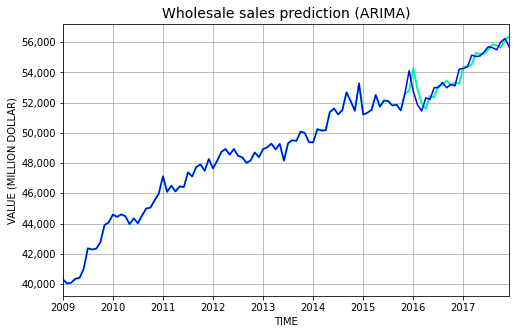

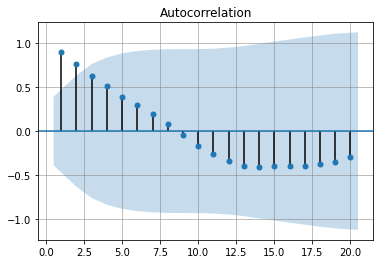

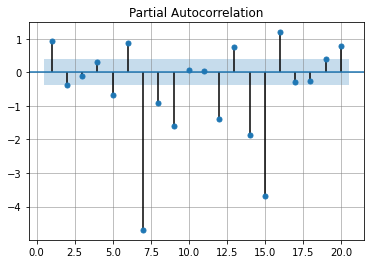

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  106
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -829.538
Method:                           css   S.D. of innovations            606.008
Date:                Wed, 29 Jul 2020   AIC                           1663.076
Time:                        06:10:06   BIC                           1668.403
Sample:                             1   HQIC                          1665.236
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.2453     58.861      2.553      0.012      34.880     265.610
                  0
count  1.060000e+02
mean   1.581963e-14
std    6.088874e+02
min   -2.217245e+03
25%   -3.029953e+02
50%   -1.27

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


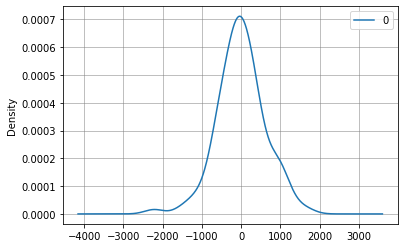

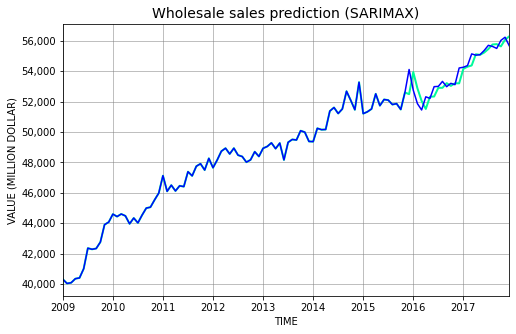

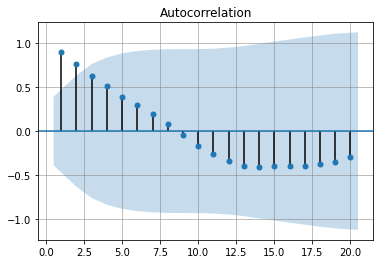

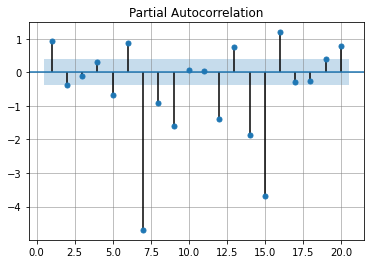

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(6, 1, 1)   Log Likelihood                -825.235
Date:                Wed, 29 Jul 2020   AIC                           1666.471
Time:                        06:10:12   BIC                           1687.778
Sample:                             0   HQIC                          1675.107
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6312      0.170      3.711      0.000       0.298       0.965
ar.L2          0.0497      0.073      0.684      0.494      -0.093       0.192
ar.L3          0.0351      0.094      0.373      0.7

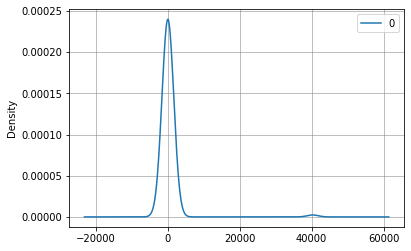

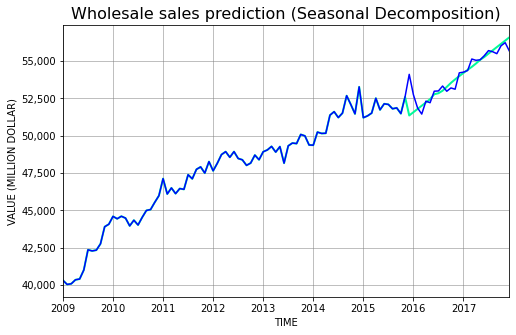

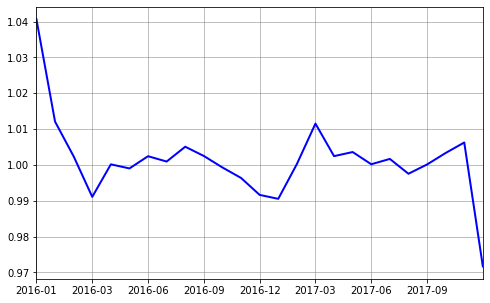

North American Industry Classification System (NAICS)  ...  Seasonal Decompose_MAPE
0                              Total Wholesale Sales     ...                 0.735513

[1 rows x 7 columns]

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
from google.colab import  drive
drive.mount('/drive')
#df_Error_Table = pd.DataFrame(columns=['P','D','Q','North American Industry Classification System (NAICS)', 'ARIMA_RMSE', 'ARIMA_MAPE','SARIMAX_RMSE','SARIMAX_MAPE','Seasonal Decompose_RMSE','Seasonal Decompose_MAPE'])
df_Error_Table = pd.DataFrame(columns=['North American Industry Classification System (NAICS)', 'ARIMA_RMSE', 'ARIMA_MAPE','SARIMAX_RMSE','SARIMAX_MAPE','Seasonal Decompose_RMSE','Seasonal Decompose_MAPE'])

df_NAICS_All_T = pd.DataFrame(NAICS_Wholesale_Data, columns = ['REF_DATE','North American Industry Classification System (NAICS)','VALUE','YEAR'])
#df_NAICS_All_T = df_NAICS_All_T.loc[(df_NAICS_All_T['YEAR'] != '2020')]
df_NAICS_All_T = df_NAICS_All_T.loc[(df_NAICS_All_T['YEAR'] != '2020') & (df_NAICS_All_T['YEAR'] != '2019') & (df_NAICS_All_T['YEAR'] != '2018')]
df_NAICS_All = pd.DataFrame(df_NAICS_All_T, columns = ['REF_DATE','VALUE'])

#df_NAICS_All

df_NAICS_All_P = pd.pivot_table(df_NAICS_All, values='REF_DATE', index='REF_DATE', aggfunc=np.sum)
df_NAICS_All_P['VALUE'] = df_NAICS_All_P['VALUE'].astype(float)

#df_NAICS_All_P

df_NAICS_All_P = df_NAICS_All_P.reset_index()
df_NAICS_All_P_N = df_NAICS_All_P['VALUE'].to_numpy()

df_NAICS_All_P_N.shape

A_RMSE = 0
A_MAPE = 0
S_RMSE = 0
S_MAPE = 0
SD_RMSE = 0
SD_MAPE = 0

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale_CV (df_NAICS_All_P_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale_CV (df_NAICS_All_P_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale_CV (df_NAICS_All_P_N, 0, 0, 12)
    
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Total Wholesale Sales', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)
df_Error_Table.to_csv('/drive/My Drive/RU Data Science/Major Research Project/Python Code/ARIMA_Test/df_Error_Table_Wholesales_All_After_CV.csv')
df_Error_Table

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


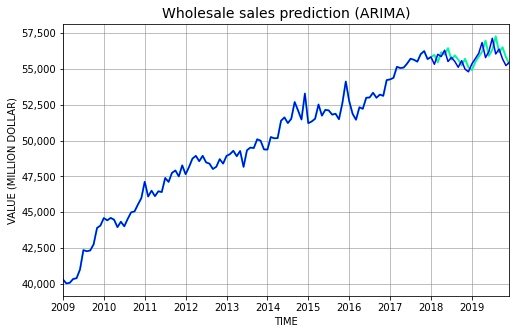

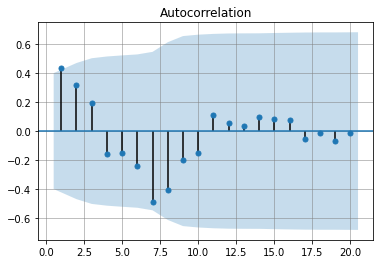

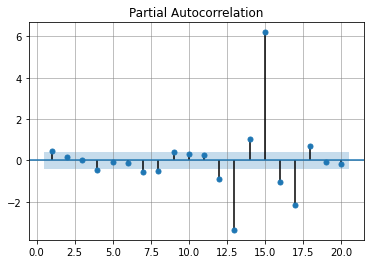

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  130
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1017.342
Method:                           css   S.D. of innovations            605.934
Date:                Wed, 29 Jul 2020   AIC                           2038.684
Time:                        06:07:52   BIC                           2044.419
Sample:                             1   HQIC                          2041.015
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.7308     53.144      2.159      0.033      10.571     218.891
                  0
count  1.300000e+02
mean   5.361100e-07
std    6.082779e+02
min   -2.181731e+03
25%   -4.059808e+02
50%    2.02

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


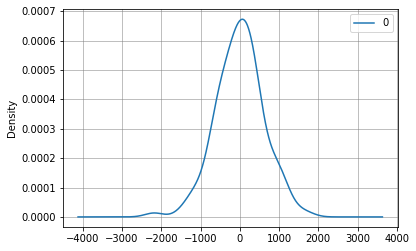

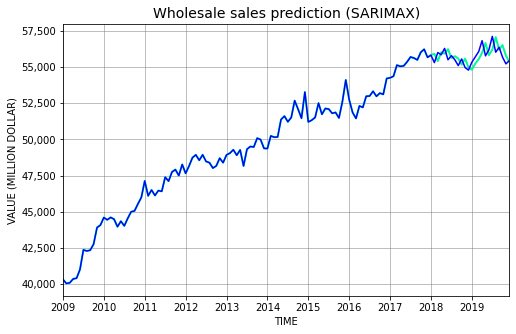

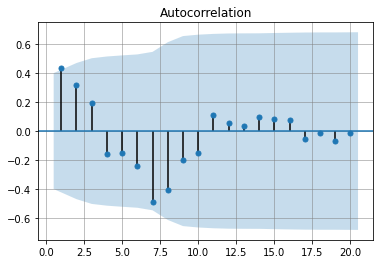

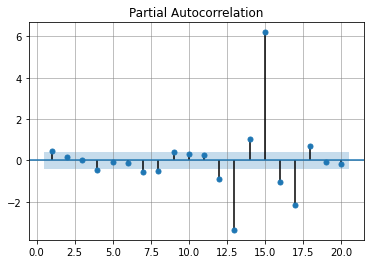

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  131
Model:               SARIMAX(6, 1, 1)   Log Likelihood               -1011.890
Date:                Wed, 29 Jul 2020   AIC                           2039.779
Time:                        06:07:58   BIC                           2062.720
Sample:                             0   HQIC                          2049.101
                                - 131                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6178      0.192      3.223      0.001       0.242       0.993
ar.L2          0.0613      0.076      0.802      0.423      -0.089       0.211
ar.L3          0.0381      0.094      0.407      0.6

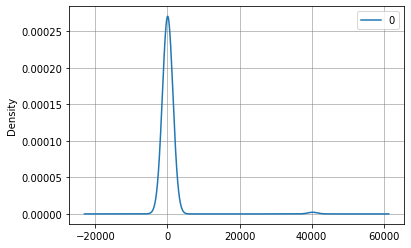

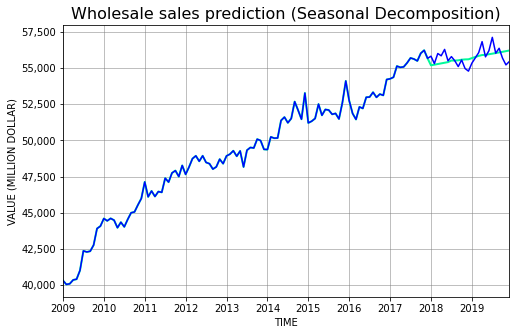

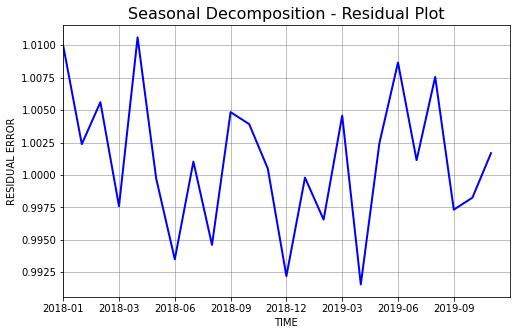

North American Industry Classification System (NAICS)  ...  Seasonal Decompose_MAPE
0                              Total Wholesale Sales     ...                 0.797567

[1 rows x 7 columns]

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
from google.colab import  drive
drive.mount('/drive')
#df_Error_Table = pd.DataFrame(columns=['P','D','Q','North American Industry Classification System (NAICS)', 'ARIMA_RMSE', 'ARIMA_MAPE','SARIMAX_RMSE','SARIMAX_MAPE','Seasonal Decompose_RMSE','Seasonal Decompose_MAPE'])
df_Error_Table = pd.DataFrame(columns=['North American Industry Classification System (NAICS)', 'ARIMA_RMSE', 'ARIMA_MAPE','SARIMAX_RMSE','SARIMAX_MAPE','Seasonal Decompose_RMSE','Seasonal Decompose_MAPE'])

df_NAICS_All_T = pd.DataFrame(NAICS_Wholesale_Data, columns = ['REF_DATE','North American Industry Classification System (NAICS)','VALUE','YEAR'])
df_NAICS_All_T = df_NAICS_All_T.loc[(df_NAICS_All_T['YEAR'] != '2020')]
#df_NAICS_All_T = df_NAICS_All_T.loc[(df_NAICS_All_T['YEAR'] != '2020') & (df_NAICS_All_T['YEAR'] != '2019') & (df_NAICS_All_T['YEAR'] != '2018')]
df_NAICS_All = pd.DataFrame(df_NAICS_All_T, columns = ['REF_DATE','VALUE'])

#df_NAICS_All

df_NAICS_All_P = pd.pivot_table(df_NAICS_All, values='REF_DATE', index='REF_DATE', aggfunc=np.sum)
df_NAICS_All_P['VALUE'] = df_NAICS_All_P['VALUE'].astype(float)

#df_NAICS_All_P

df_NAICS_All_P = df_NAICS_All_P.reset_index()
df_NAICS_All_P_N = df_NAICS_All_P['VALUE'].to_numpy()

df_NAICS_All_P_N.shape

A_RMSE = 0
A_MAPE = 0
S_RMSE = 0
S_MAPE = 0
SD_RMSE = 0
SD_MAPE = 0

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_NAICS_All_P_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_NAICS_All_P_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_NAICS_All_P_N, 0, 0, 12)
    
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Total Wholesale Sales', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)
df_Error_Table.to_csv('/drive/My Drive/RU Data Science/Major Research Project/Python Code/ARIMA_Test/df_Error_Table_Wholesales_All_Test_Set.csv')
df_Error_Table

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


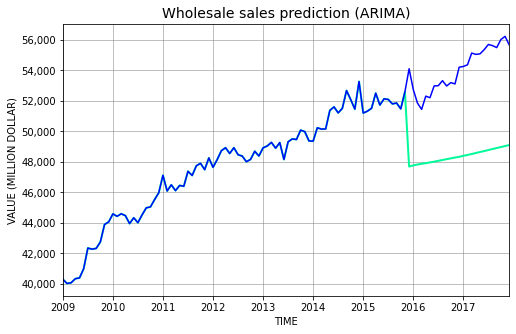

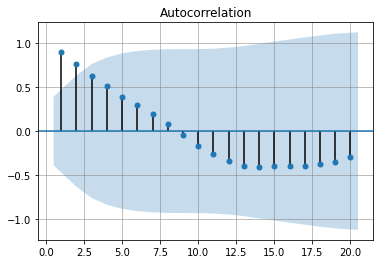

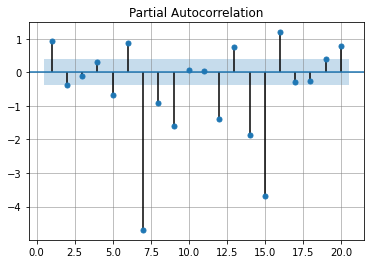

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  107
Model:                     ARMA(0, 0)   Log Likelihood               -1040.993
Method:                           css   S.D. of innovations           4064.176
Date:                Wed, 29 Jul 2020   AIC                           2085.986
Time:                        06:10:28   BIC                           2091.331
Sample:                             0   HQIC                          2088.153
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.911e+04    392.899    124.995      0.000    4.83e+04    4.99e+04
                  0
count  1.070000e+02
mean   1.427992e-11
std    4.083302e+03
min   -9.076570e+03
25%   -2.678070e+03
50%    1.73

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


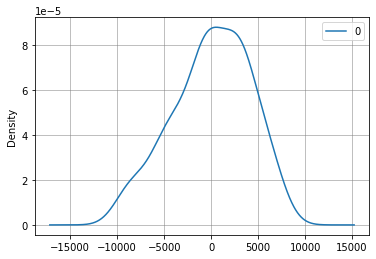

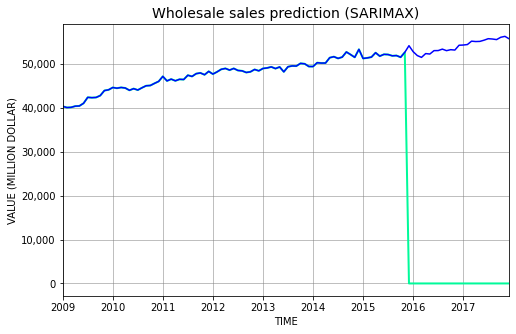

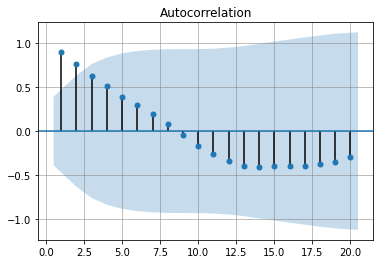

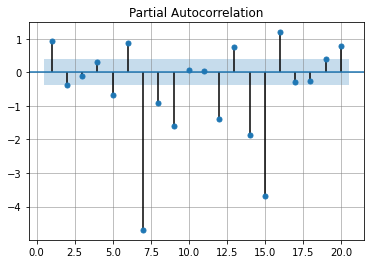

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:                        SARIMAX   Log Likelihood               -1307.987
Date:                Wed, 29 Jul 2020   AIC                           2617.975
Time:                        06:10:29   BIC                           2620.647
Sample:                             0   HQIC                          2619.058
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.428e+09    2.9e+09      0.838      0.402   -3.25e+09    8.11e+09
Ljung-Box (Q):                     1114.58   Jarque-Bera (JB):                 3.98
Prob(Q):                              0.00   Pr

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/seasonal.py:133: RuntimeWarning: divide by zero encountered in true_divide
  filt = np.array([.5] + [1] * (freq - 1) + [.5]) / freq
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


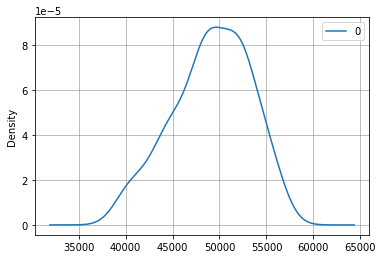

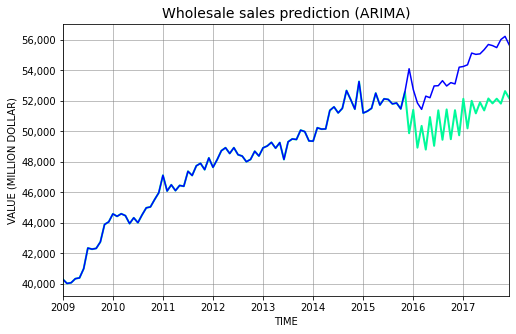

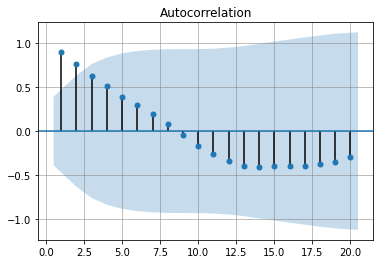

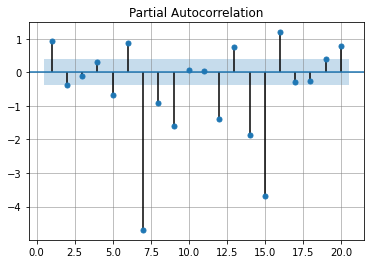

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  107
Model:                     ARMA(0, 1)   Log Likelihood                -982.562
Method:                       css-mle   S.D. of innovations           2338.280
Date:                Wed, 29 Jul 2020   AIC                           1971.123
Time:                        06:10:31   BIC                           1979.142
Sample:                             0   HQIC                          1974.374
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.911e+04    421.548    116.488      0.000    4.83e+04    4.99e+04
ma.L1.y        0.8729      0.035     24.715      0.000       0.804       0.942
                                    Roots           

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


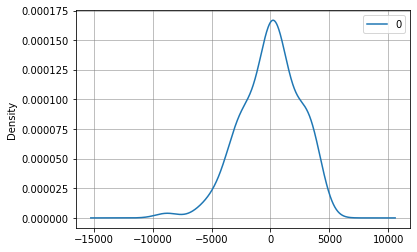

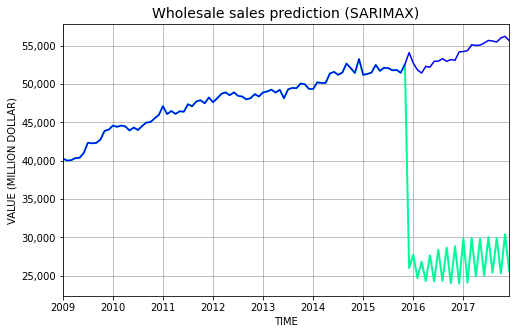

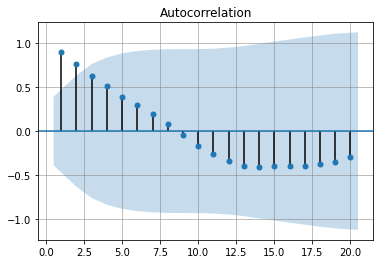

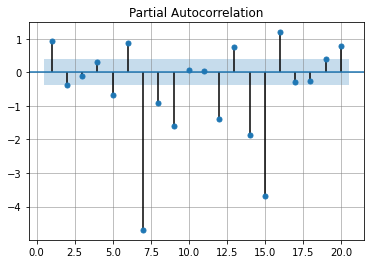

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1236.938
Date:                Wed, 29 Jul 2020   AIC                           2477.876
Time:                        06:10:33   BIC                           2483.222
Sample:                             0   HQIC                          2480.043
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.0000      0.813      1.230      0.219      -0.594       2.594
sigma2      5.741e+08   1.42e-09   4.05e+17      0.000    5.74e+08    5.74e+08
Ljung-Box (Q):                      461.82   Jarque-

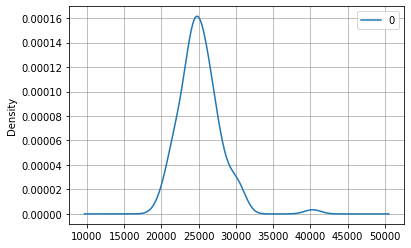

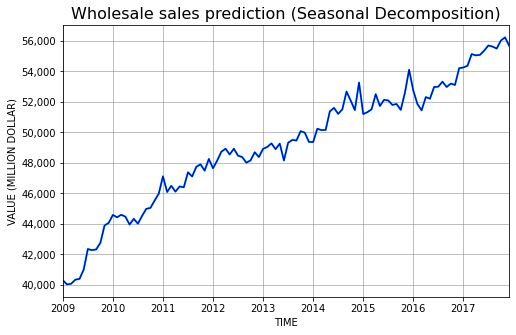

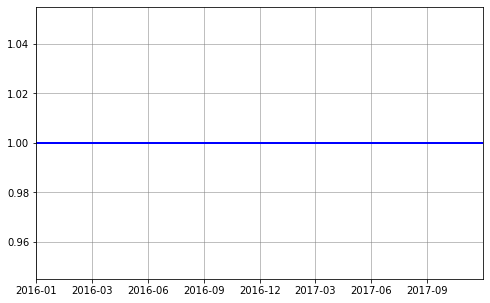

0 0 1


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


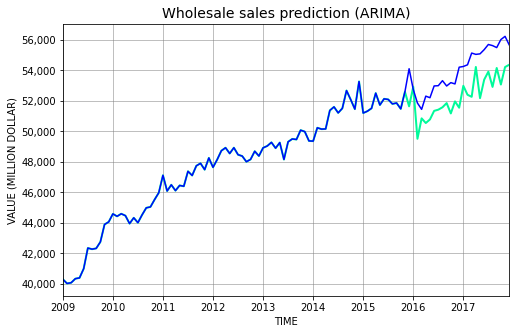

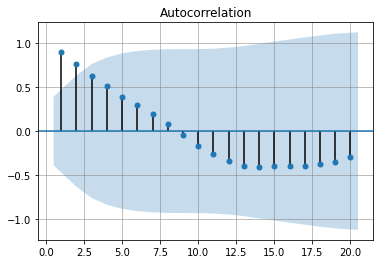

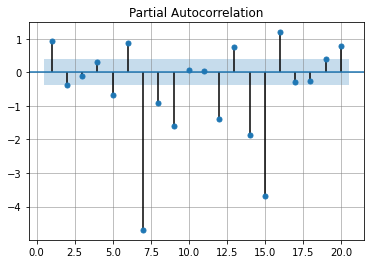

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  107
Model:                     ARMA(0, 2)   Log Likelihood                -936.704
Method:                       css-mle   S.D. of innovations           1507.441
Date:                Wed, 29 Jul 2020   AIC                           1881.408
Time:                        06:10:37   BIC                           1892.100
Sample:                             0   HQIC                          1885.742
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.909e+04    475.359    103.280      0.000    4.82e+04       5e+04
ma.L1.y        1.4231      0.057     24.838      0.000       1.311       1.535
ma.L2.y        0.8679      0.056     15.466      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


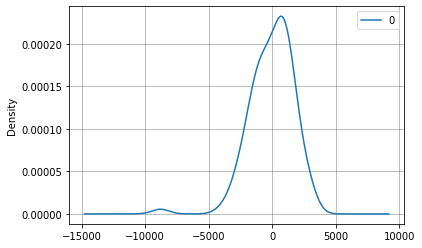

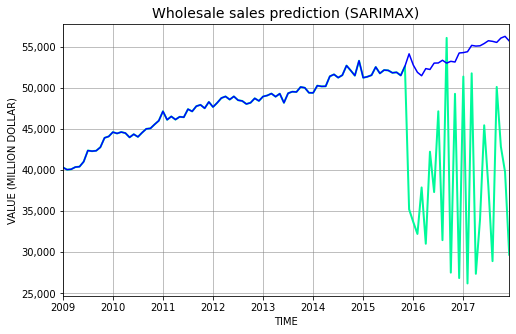

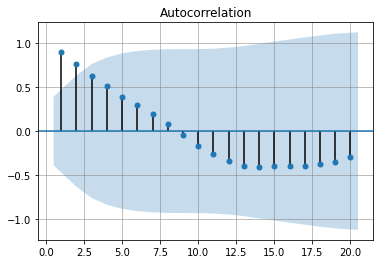

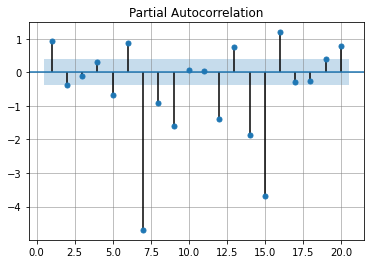

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(0, 0, 2)   Log Likelihood               -1185.879
Date:                Wed, 29 Jul 2020   AIC                           2377.759
Time:                        06:10:41   BIC                           2385.777
Sample:                             0   HQIC                          2381.009
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.7564      0.746      2.354      0.019       0.294       3.219
ma.L2          0.7564      0.605      1.250      0.211      -0.430       1.943
sigma2      2.293e+08   4.62e-09   4.97e+16      0.0

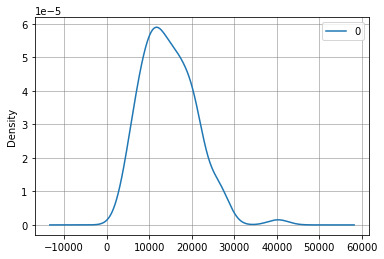

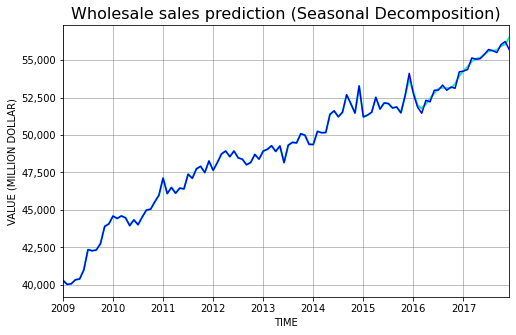

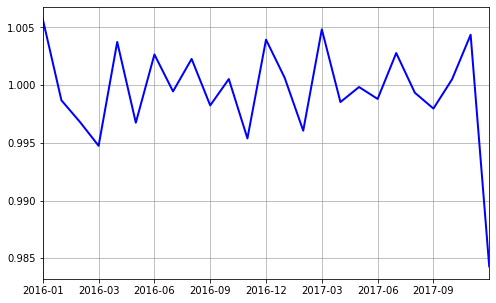

0 0 2


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


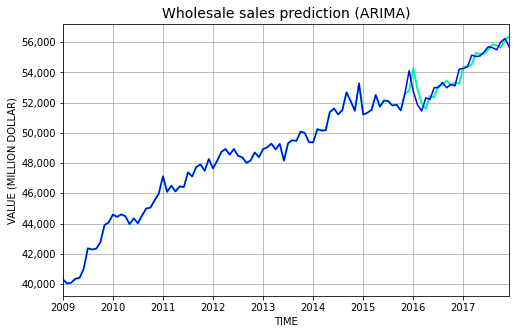

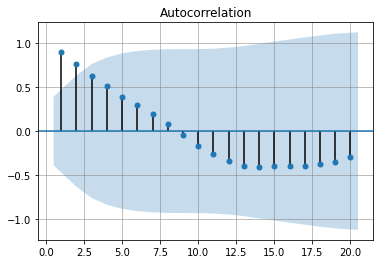

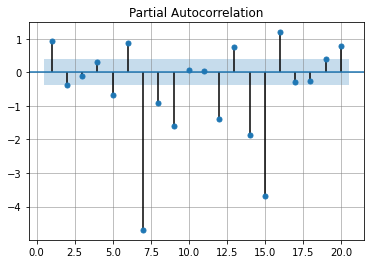

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  106
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -829.538
Method:                           css   S.D. of innovations            606.008
Date:                Wed, 29 Jul 2020   AIC                           1663.076
Time:                        06:10:43   BIC                           1668.403
Sample:                             1   HQIC                          1665.236
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.2453     58.861      2.553      0.012      34.880     265.610
                  0
count  1.060000e+02
mean   1.581963e-14
std    6.088874e+02
min   -2.217245e+03
25%   -3.029953e+02
50%   -1.27

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


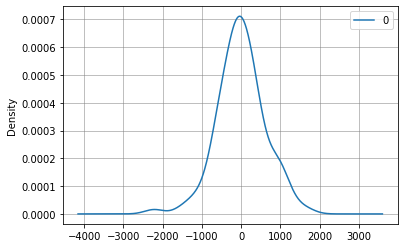

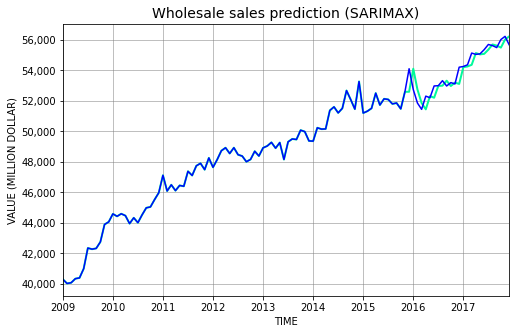

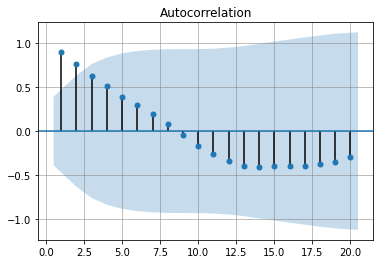

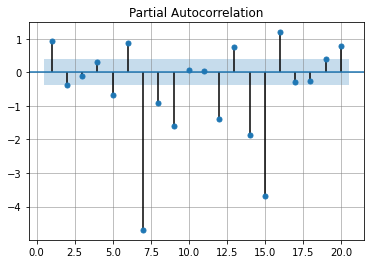

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -832.701
Date:                Wed, 29 Jul 2020   AIC                           1667.402
Time:                        06:10:44   BIC                           1670.065
Sample:                             0   HQIC                          1668.481
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.874e+05   4.37e+04      8.862      0.000    3.02e+05    4.73e+05
Ljung-Box (Q):                       34.14   Jarque-Bera (JB):                 7.74
Prob(Q):                              0.73   Pr

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/seasonal.py:133: RuntimeWarning: divide by zero encountered in true_divide
  filt = np.array([.5] + [1] * (freq - 1) + [.5]) / freq
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


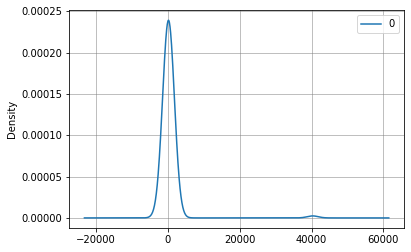

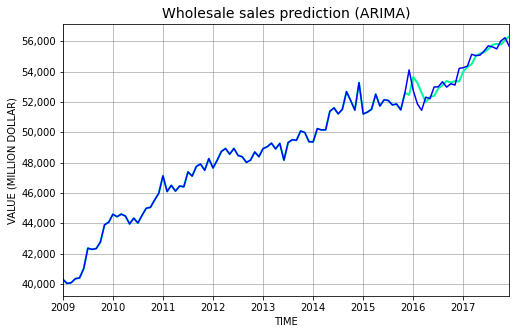

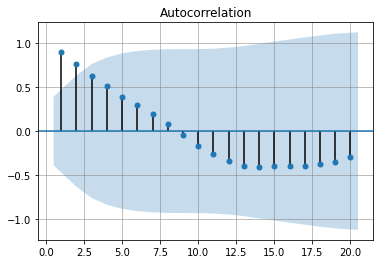

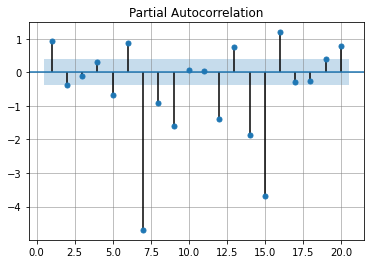

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  106
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -822.985
Method:                       css-mle   S.D. of innovations            569.221
Date:                Wed, 29 Jul 2020   AIC                           1651.971
Time:                        06:10:46   BIC                           1659.961
Sample:                             1   HQIC                          1655.209
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.2967     33.584      4.505      0.000      85.472     217.121
ma.L1.D.y     -0.3963      0.099     -3.985      0.000      -0.591      -0.201
                                    Roots           

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


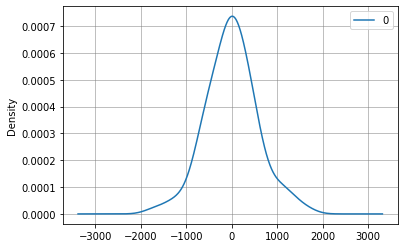

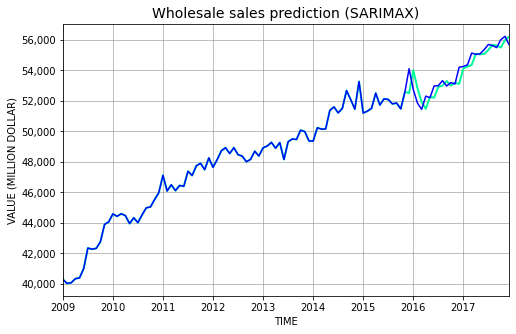

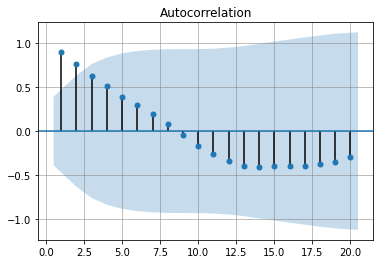

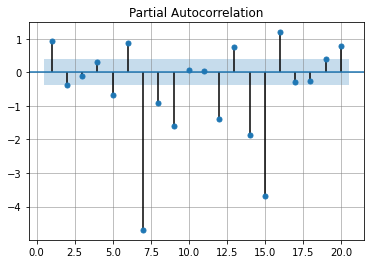

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -831.539
Date:                Wed, 29 Jul 2020   AIC                           1667.077
Time:                        06:10:47   BIC                           1672.404
Sample:                             0   HQIC                          1669.236
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0734      0.050     -1.459      0.144      -0.172       0.025
sigma2      3.831e+05    4.7e+04      8.158      0.000    2.91e+05    4.75e+05
Ljung-Box (Q):                       31.34   Jarque-

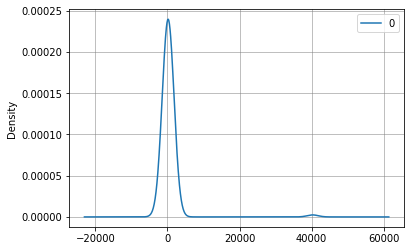

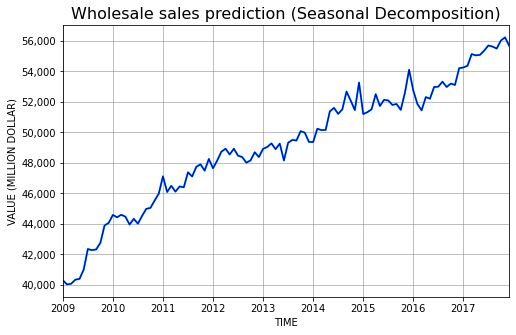

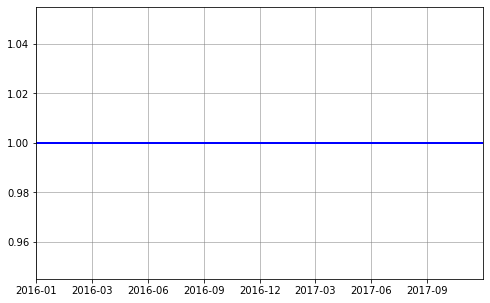

0 1 1


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


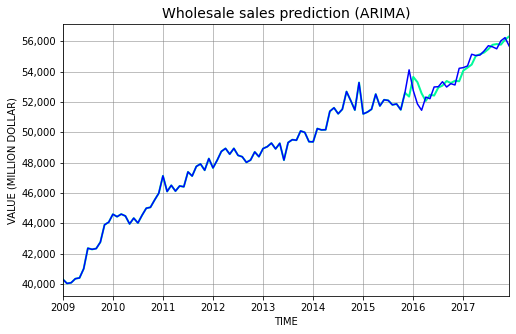

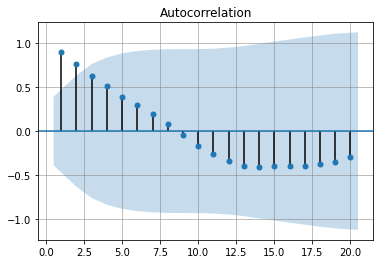

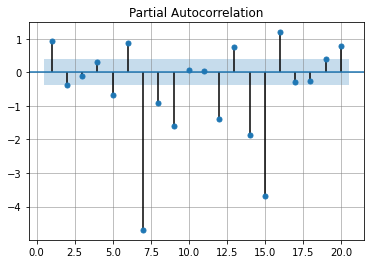

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  106
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -822.617
Method:                       css-mle   S.D. of innovations            567.191
Date:                Wed, 29 Jul 2020   AIC                           1653.234
Time:                        06:10:50   BIC                           1663.888
Sample:                             1   HQIC                          1657.552
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.1446     30.416      4.969      0.000      91.530     210.759
ma.L1.D.y     -0.3693      0.096     -3.865      0.000      -0.557      -0.182
ma.L2.D.y     -0.0838      0.096     -0.874      0.3

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


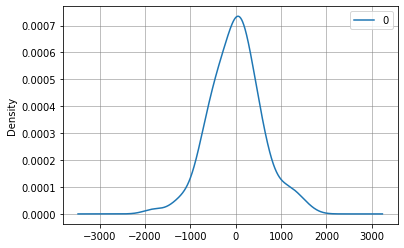

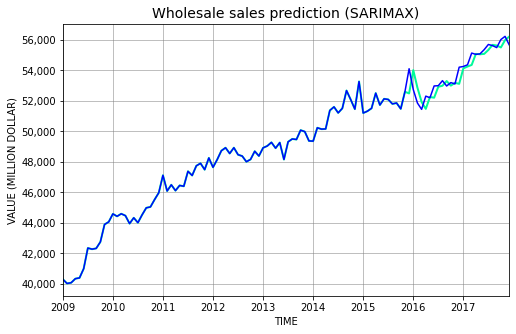

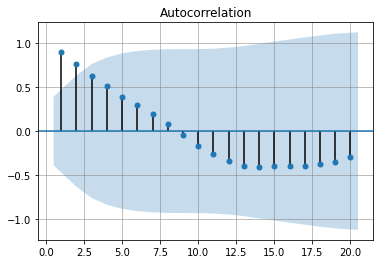

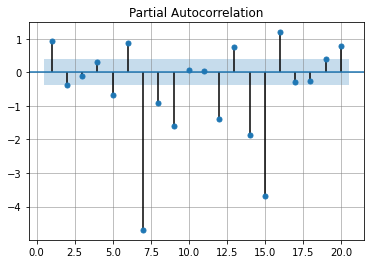

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -831.522
Date:                Wed, 29 Jul 2020   AIC                           1669.043
Time:                        06:10:51   BIC                           1677.033
Sample:                             0   HQIC                          1672.282
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0755      0.050     -1.513      0.130      -0.173       0.022
ma.L2          0.0053      0.102      0.052      0.959      -0.194       0.205
sigma2      3.728e+05   4.48e+04      8.330      0.0

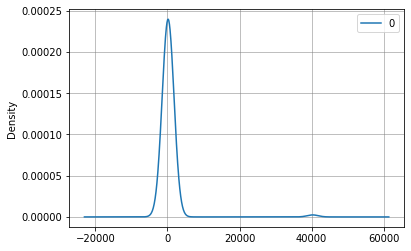

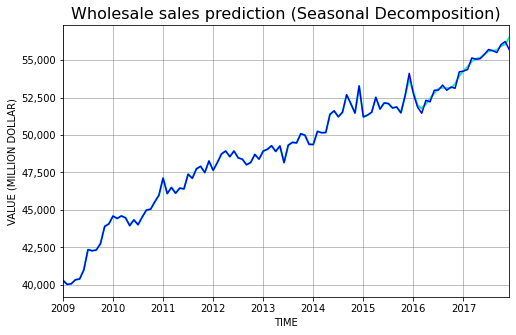

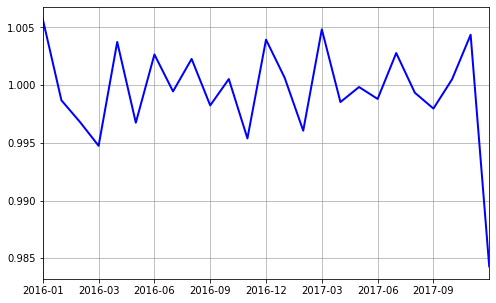

0 1 2


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


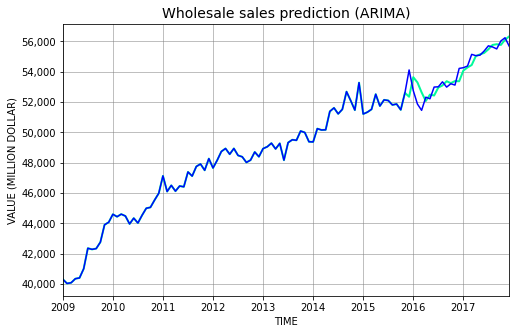

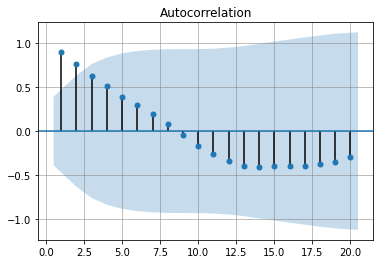

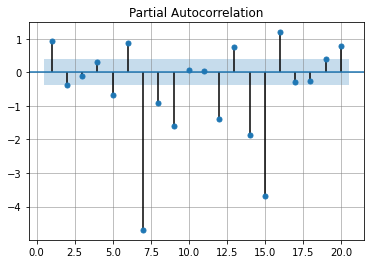

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  106
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -822.577
Method:                       css-mle   S.D. of innovations            566.966
Date:                Wed, 29 Jul 2020   AIC                           1655.153
Time:                        06:10:55   BIC                           1668.471
Sample:                             1   HQIC                          1660.551
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.0086     29.588      5.104      0.000      93.018     208.999
ma.L1.D.y     -0.3664      0.097     -3.763      0.000      -0.557      -0.176
ma.L2.D.y     -0.0786      0.099     -0.795      0.4

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


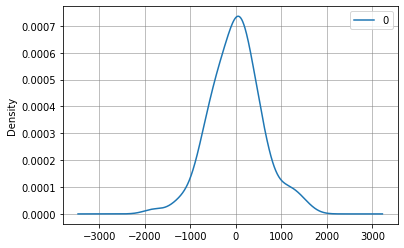

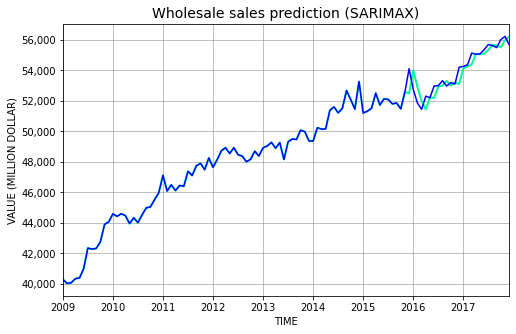

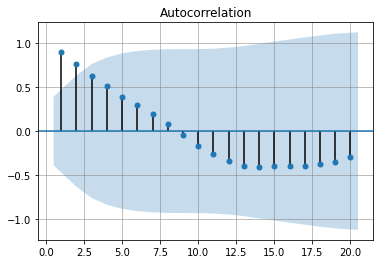

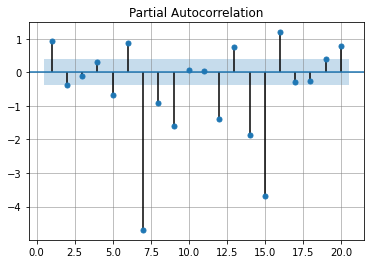

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(0, 1, 3)   Log Likelihood                -831.336
Date:                Wed, 29 Jul 2020   AIC                           1670.673
Time:                        06:10:56   BIC                           1681.327
Sample:                             0   HQIC                          1674.991
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0799      0.048     -1.663      0.096      -0.174       0.014
ma.L2          0.0044      0.097      0.045      0.964      -0.186       0.195
ma.L3          0.0284      0.090      0.315      0.7

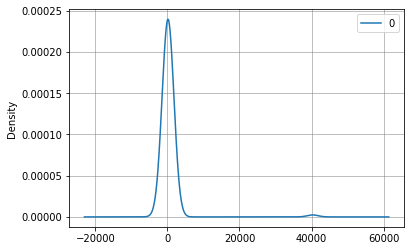

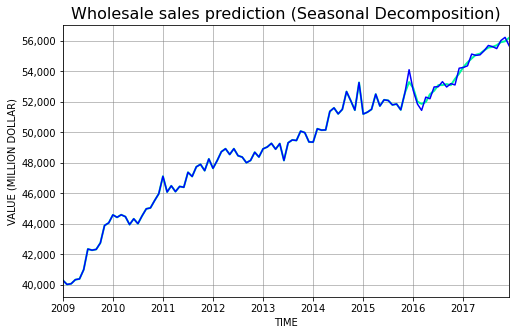

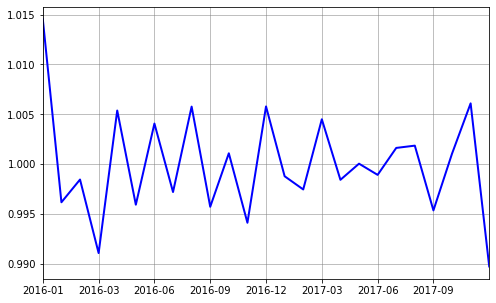

0 1 3


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


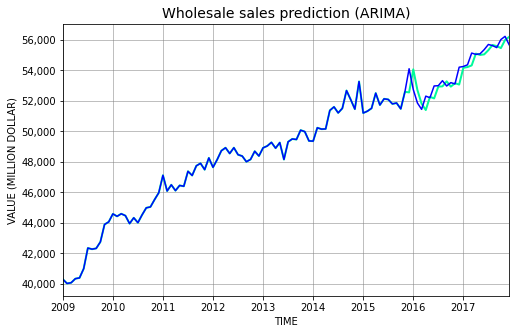

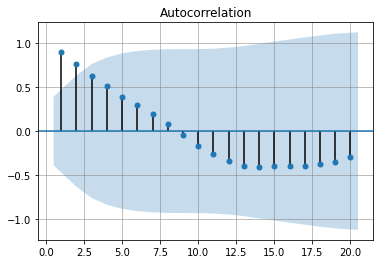

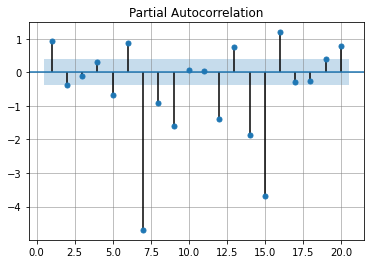

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  107
Model:                     ARMA(1, 0)   Log Likelihood                -842.944
Method:                       css-mle   S.D. of innovations            624.154
Date:                Wed, 29 Jul 2020   AIC                           1691.888
Time:                        06:10:59   BIC                           1699.907
Sample:                             0   HQIC                          1695.139
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.851e+04   6405.598      7.574      0.000     3.6e+04    6.11e+04
ar.L1.y        0.9961      0.005    189.795      0.000       0.986       1.006
                                    Roots           

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


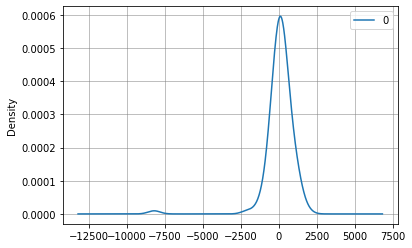

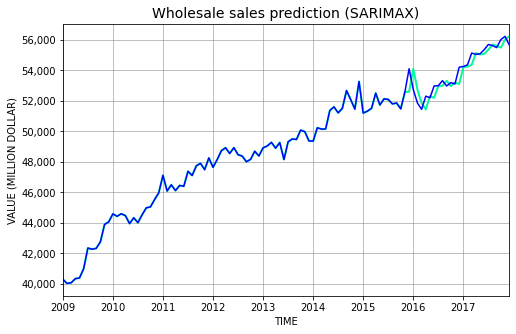

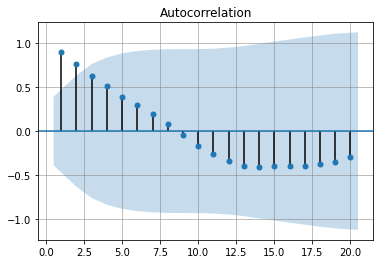

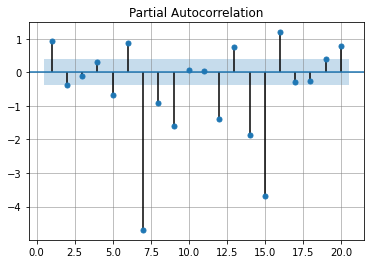

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -844.916
Date:                Wed, 29 Jul 2020   AIC                           1693.831
Time:                        06:11:01   BIC                           1699.177
Sample:                             0   HQIC                          1695.999
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.001   1816.822      0.000       0.999       1.001
sigma2      3.908e+05    5.4e-13   7.24e+17      0.000    3.91e+05    3.91e+05
Ljung-Box (Q):                       33.88   Jarque-

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/seasonal.py:133: RuntimeWarning: divide by zero encountered in true_divide
  filt = np.array([.5] + [1] * (freq - 1) + [.5]) / freq
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-p

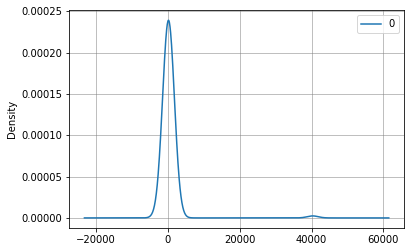

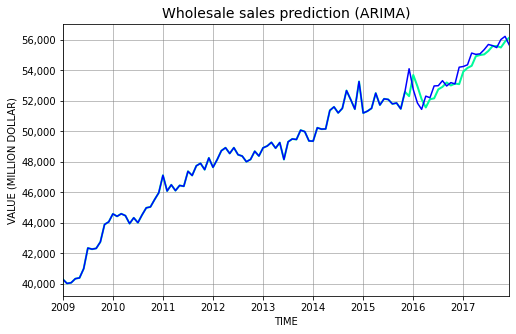

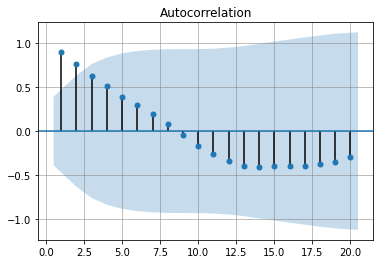

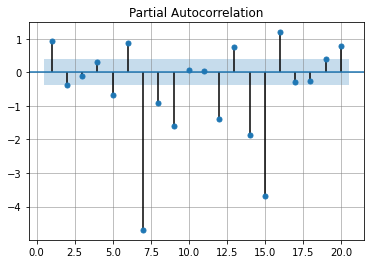

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  107
Model:                     ARMA(1, 1)   Log Likelihood                -840.319
Method:                       css-mle   S.D. of innovations            608.464
Date:                Wed, 29 Jul 2020   AIC                           1688.639
Time:                        06:11:05   BIC                           1699.330
Sample:                             0   HQIC                          1692.973
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.84e+04   7022.266      6.893      0.000    3.46e+04    6.22e+04
ar.L1.y        0.9979      0.003    343.571      0.000       0.992       1.004
ma.L1.y       -0.2182      0.090     -2.431      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


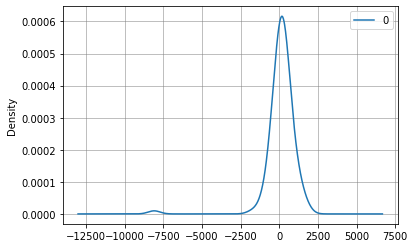

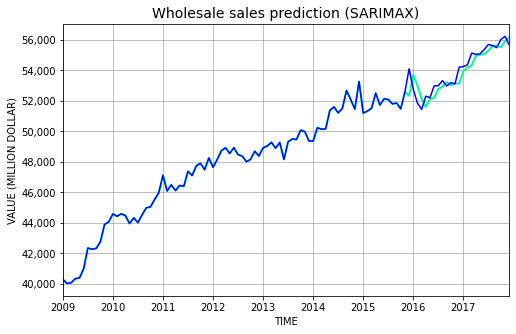

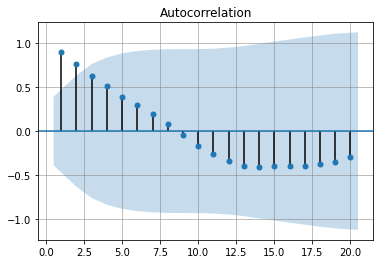

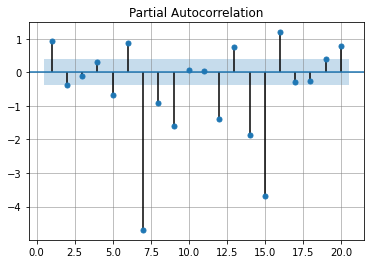

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -842.220
Date:                Wed, 29 Jul 2020   AIC                           1690.440
Time:                        06:11:09   BIC                           1698.459
Sample:                             0   HQIC                          1693.691
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   3515.816      0.000       0.999       1.001
ma.L1         -0.2201      0.078     -2.832      0.005      -0.372      -0.068
sigma2      3.703e+05   1.57e-08   2.36e+13      0.0

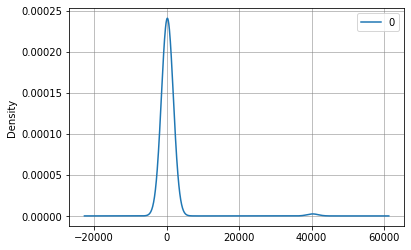

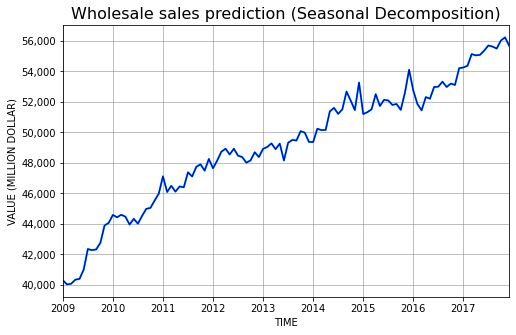

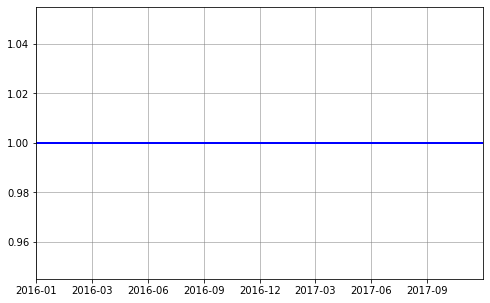

1 0 1


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


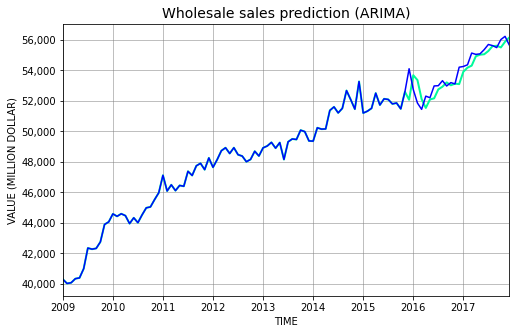

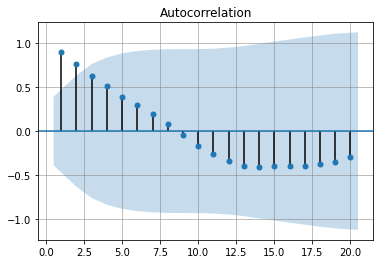

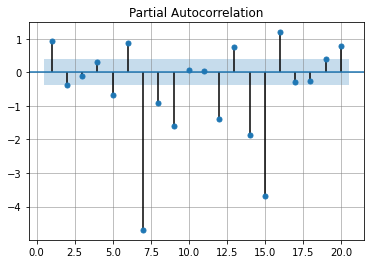

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  107
Model:                     ARMA(1, 2)   Log Likelihood                -840.253
Method:                       css-mle   S.D. of innovations            608.068
Date:                Wed, 29 Jul 2020   AIC                           1690.506
Time:                        06:11:15   BIC                           1703.870
Sample:                             0   HQIC                          1695.923
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.858e+04   7008.168      6.932      0.000    3.48e+04    6.23e+04
ar.L1.y        0.9978      0.003    324.726      0.000       0.992       1.004
ma.L1.y       -0.2324      0.101     -2.298      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

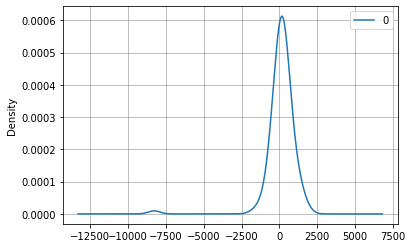

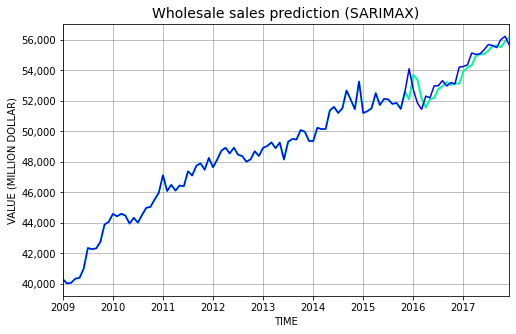

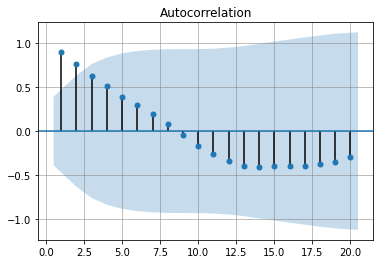

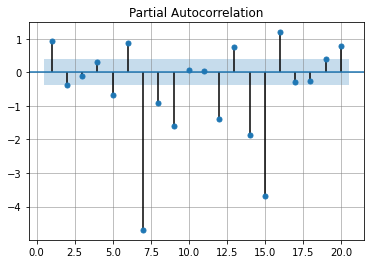

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -842.156
Date:                Wed, 29 Jul 2020   AIC                           1692.312
Time:                        06:11:20   BIC                           1703.004
Sample:                             0   HQIC                          1696.647
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   3280.972      0.000       0.999       1.001
ma.L1         -0.2340      0.078     -3.012      0.003      -0.386      -0.082
ma.L2          0.0337      0.092      0.364      0.7

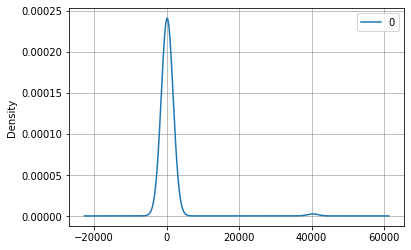

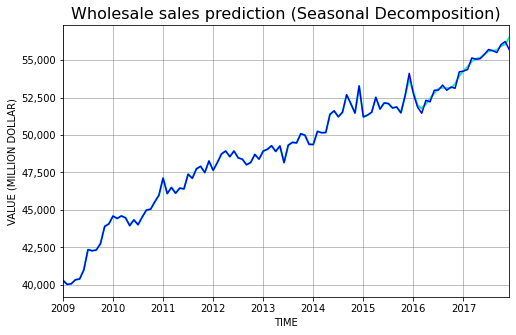

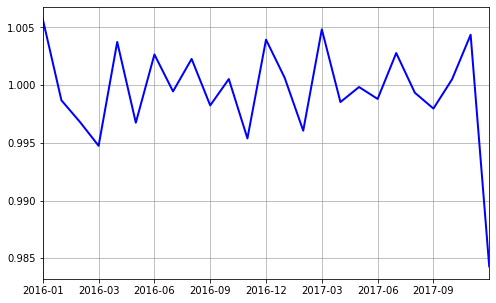

1 0 2


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


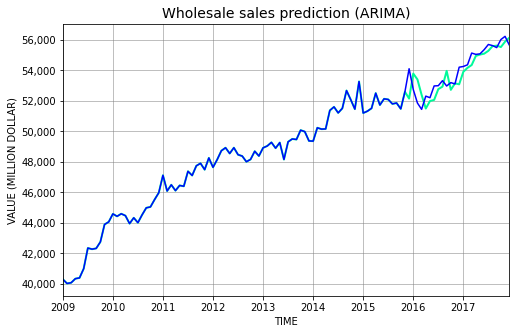

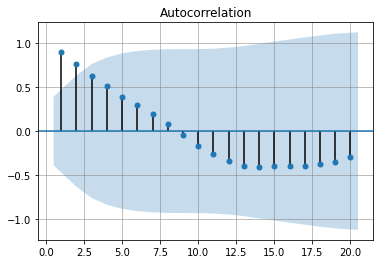

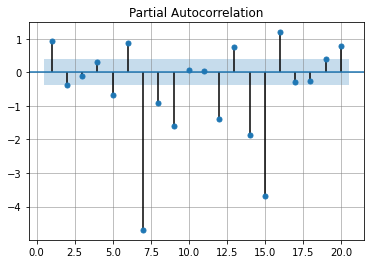

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  107
Model:                     ARMA(1, 3)   Log Likelihood                -839.925
Method:                       css-mle   S.D. of innovations            606.183
Date:                Wed, 29 Jul 2020   AIC                           1691.850
Time:                        06:11:30   BIC                           1707.887
Sample:                             0   HQIC                          1698.351
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.853e+04   6911.011      7.022      0.000     3.5e+04    6.21e+04
ar.L1.y        0.9975      0.004    284.848      0.000       0.991       1.004
ma.L1.y       -0.2378      0.097     -2.457      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

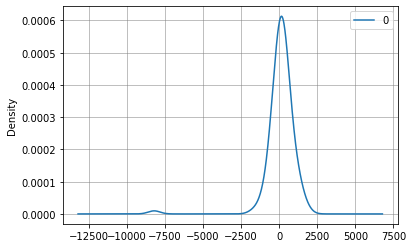

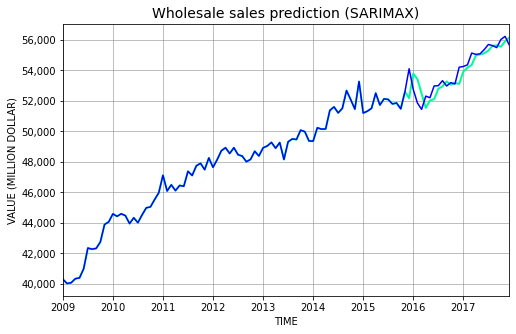

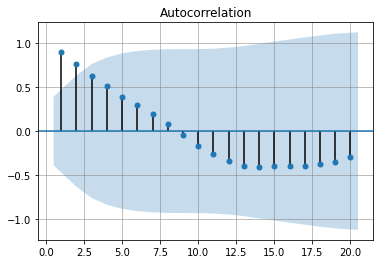

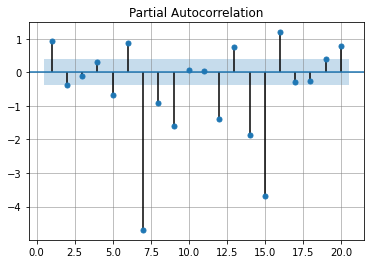

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(1, 0, 3)   Log Likelihood                -841.839
Date:                Wed, 29 Jul 2020   AIC                           1693.678
Time:                        06:11:36   BIC                           1707.042
Sample:                             0   HQIC                          1699.096
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.000   3494.158      0.000       0.999       1.001
ma.L1         -0.2397      0.080     -3.001      0.003      -0.396      -0.083
ma.L2          0.0259      0.095      0.272      0.7

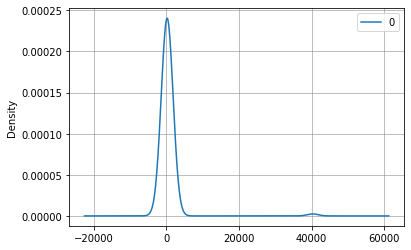

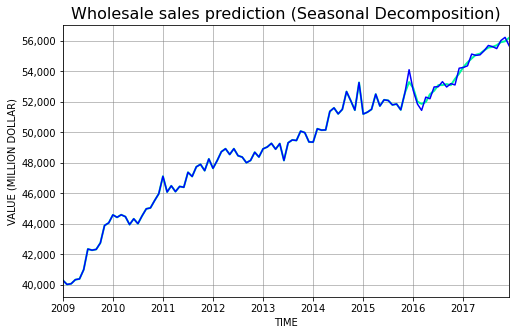

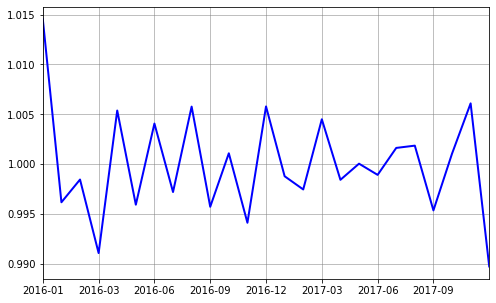

1 0 3


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


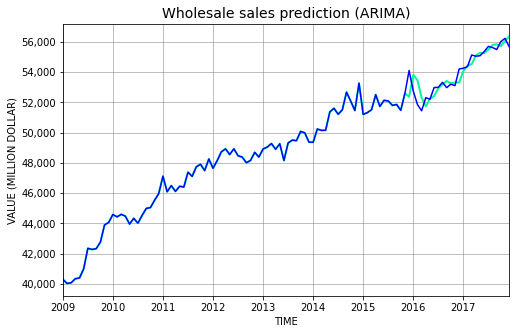

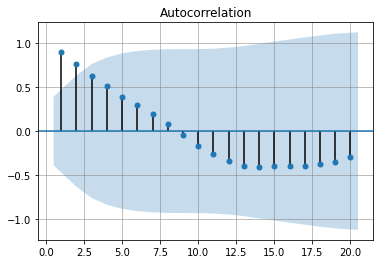

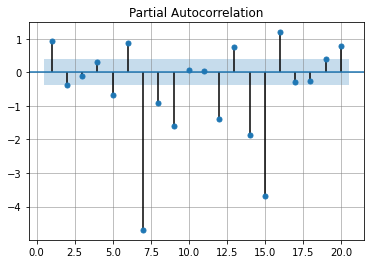

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  106
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -824.661
Method:                       css-mle   S.D. of innovations            578.507
Date:                Wed, 29 Jul 2020   AIC                           1655.322
Time:                        06:11:38   BIC                           1663.312
Sample:                             1   HQIC                          1658.561
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.0386     43.458      3.475      0.001      65.862     236.215
ar.L1.D.y     -0.2958      0.092     -3.200      0.002      -0.477      -0.115
                                    Roots           

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


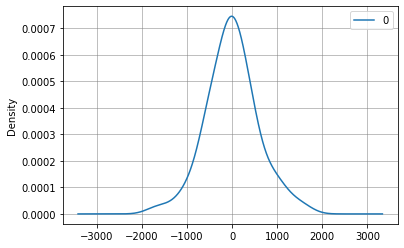

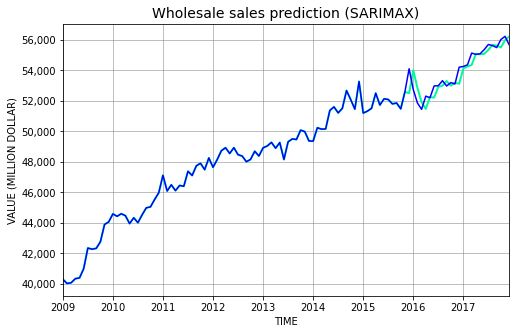

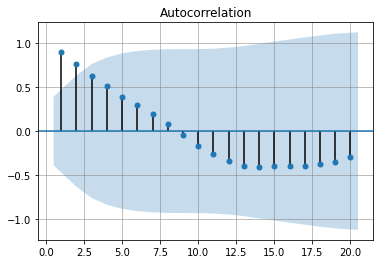

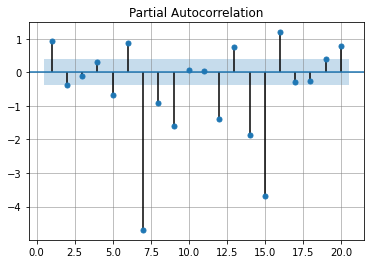

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -831.527
Date:                Wed, 29 Jul 2020   AIC                           1667.054
Time:                        06:11:39   BIC                           1672.380
Sample:                             0   HQIC                          1669.213
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0748      0.048     -1.549      0.121      -0.169       0.020
sigma2      3.735e+05   4.45e+04      8.392      0.000    2.86e+05    4.61e+05
Ljung-Box (Q):                       31.49   Jarque-

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/seasonal.py:133: RuntimeWarning: divide by zero encountered in true_divide
  filt = np.array([.5] + [1] * (freq - 1) + [.5]) / freq
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


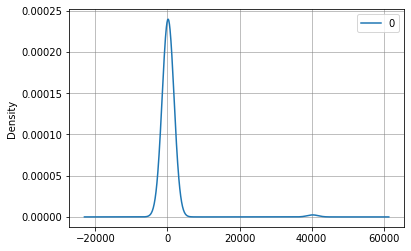

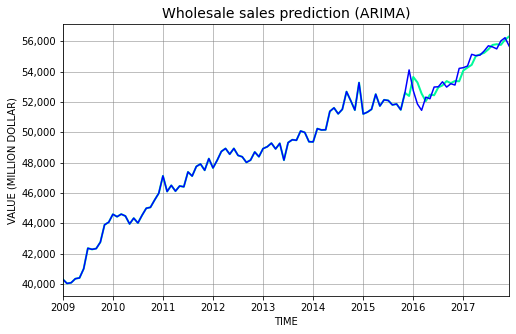

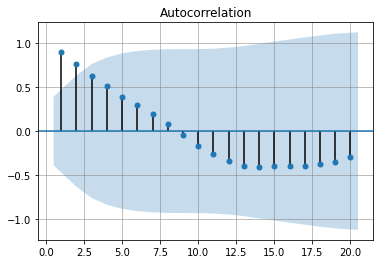

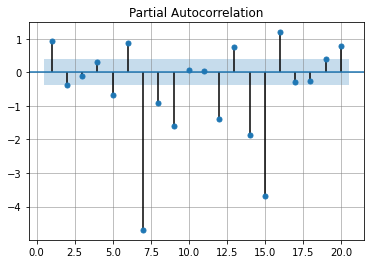

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  106
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -822.570
Method:                       css-mle   S.D. of innovations            566.930
Date:                Wed, 29 Jul 2020   AIC                           1653.140
Time:                        06:11:42   BIC                           1663.794
Sample:                             1   HQIC                          1657.458
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.9452     29.427      5.130      0.000      93.270     208.620
ar.L1.D.y      0.2263      0.234      0.969      0.335      -0.232       0.684
ma.L1.D.y     -0.5912      0.195     -3.036      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


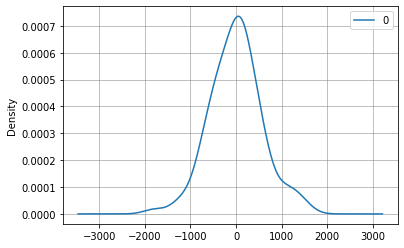

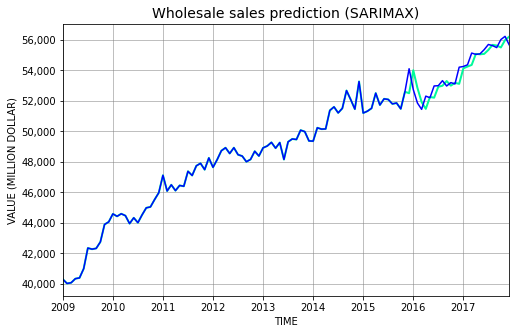

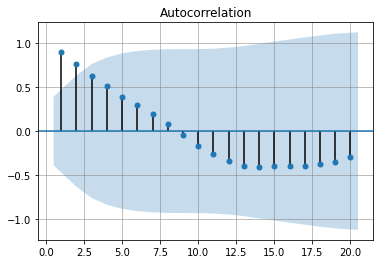

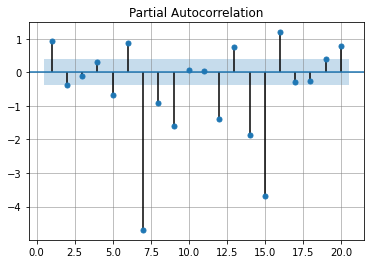

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -831.535
Date:                Wed, 29 Jul 2020   AIC                           1669.070
Time:                        06:11:44   BIC                           1677.060
Sample:                             0   HQIC                          1672.309
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0381      1.428     -0.027      0.979      -2.838       2.761
ma.L1         -0.0355      1.441     -0.025      0.980      -2.859       2.788
sigma2       3.83e+05   4.73e+04      8.091      0.0

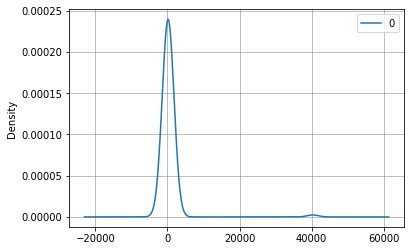

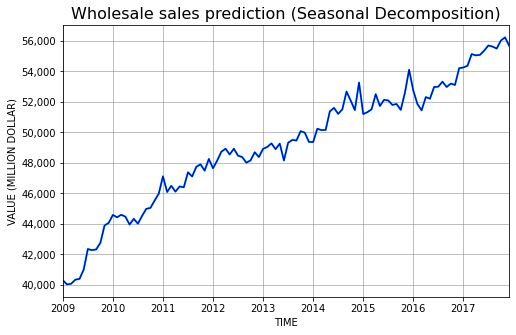

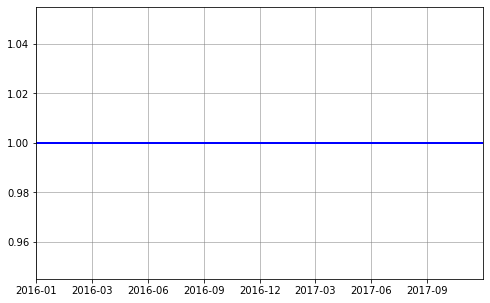

1 1 1


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


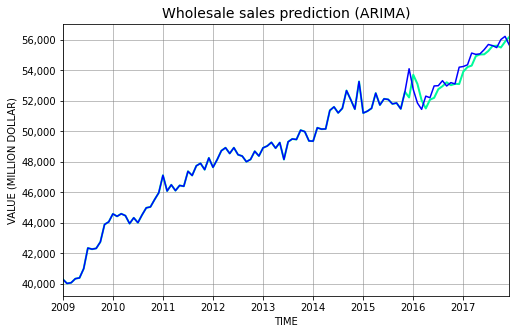

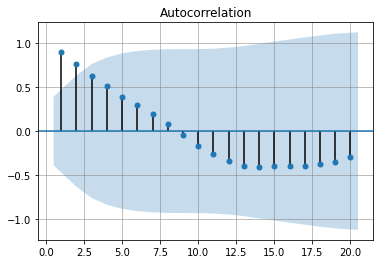

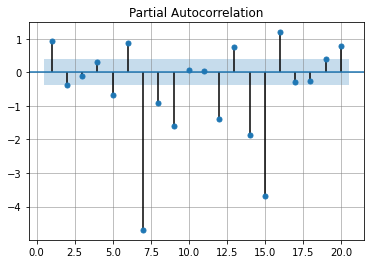

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  107
Model:                     ARMA(2, 0)   Log Likelihood                -840.903
Method:                       css-mle   S.D. of innovations            608.766
Date:                Wed, 29 Jul 2020   AIC                           1689.806
Time:                        06:11:49   BIC                           1700.497
Sample:                             0   HQIC                          1694.140
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.821e+04        nan        nan        nan         nan         nan
ar.L1.y        0.7799      0.086      9.112      0.000       0.612       0.948
ar.L2.y        0.2191      0.086      2.558      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


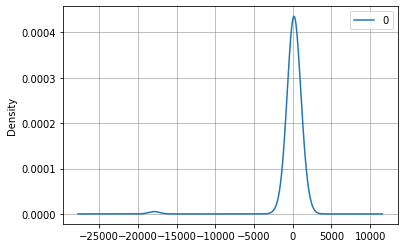

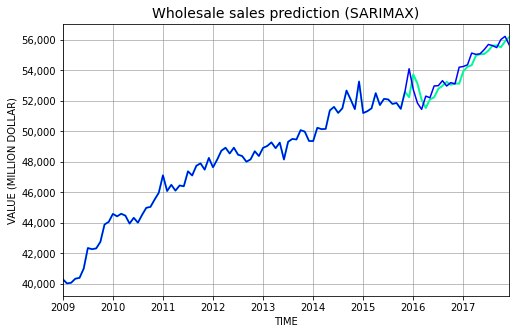

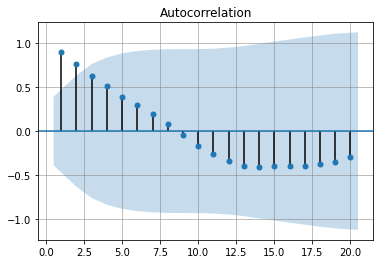

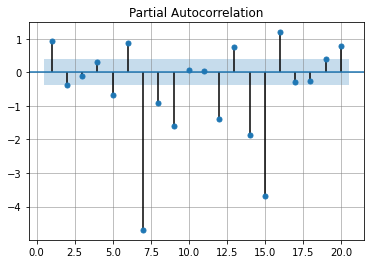

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -842.284
Date:                Wed, 29 Jul 2020   AIC                           1690.569
Time:                        06:11:53   BIC                           1698.587
Sample:                             0   HQIC                          1693.819
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7803      0.071     11.006      0.000       0.641       0.919
ar.L2          0.2196      0.071      3.096      0.002       0.081       0.359
sigma2      3.632e+05   1.67e-08   2.17e+13      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/seasonal.py:133: RuntimeWarning: divide by zero encountered in true_divide
  filt = np.array([.5] + [1] * (freq - 1) + [.5]) / freq
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


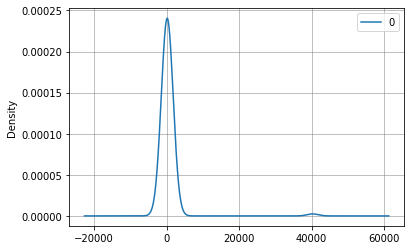

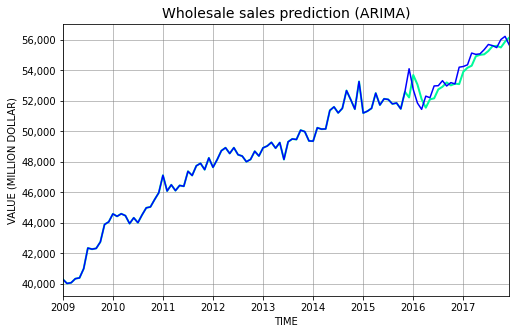

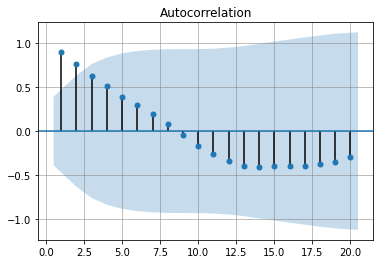

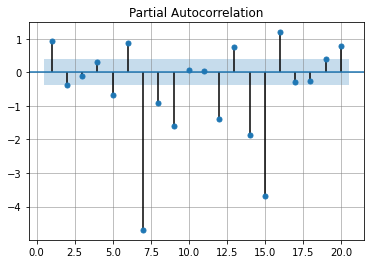

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  107
Model:                     ARMA(2, 1)   Log Likelihood                -840.281
Method:                       css-mle   S.D. of innovations            608.230
Date:                Wed, 29 Jul 2020   AIC                           1690.562
Time:                        06:11:59   BIC                           1703.927
Sample:                             0   HQIC                          1695.980
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.856e+04   7027.522      6.910      0.000    3.48e+04    6.23e+04
ar.L1.y        0.9076      0.308      2.949      0.004       0.304       1.511
ar.L2.y        0.0901      0.307      0.293      0.7

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

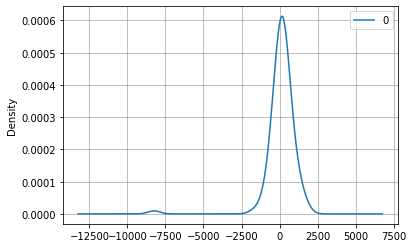

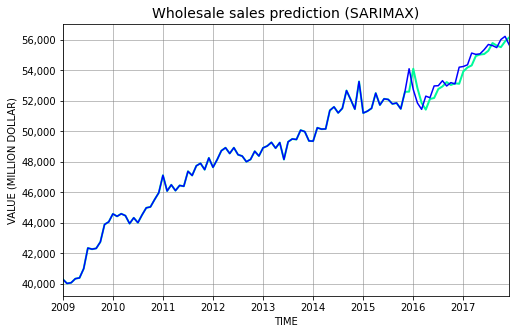

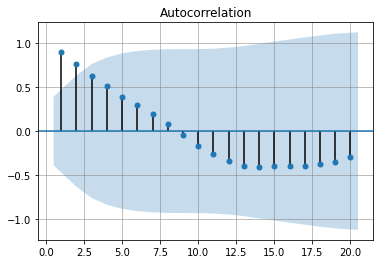

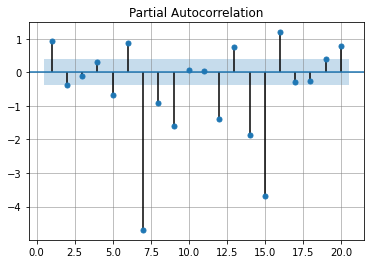

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -842.186
Date:                Wed, 29 Jul 2020   AIC                           1692.372
Time:                        06:12:04   BIC                           1703.063
Sample:                             0   HQIC                          1696.706
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9191      0.434      2.116      0.034       0.068       1.770
ar.L2          0.0809      0.434      0.186      0.852      -0.770       0.932
ma.L1         -0.1467      0.447     -0.328      0.7

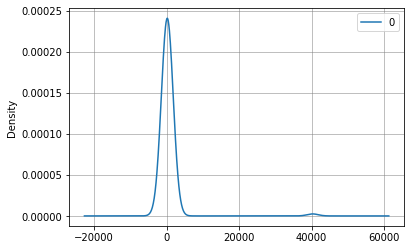

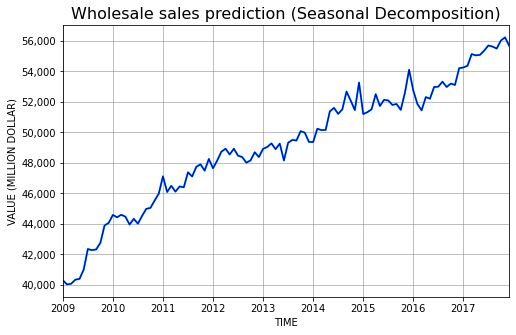

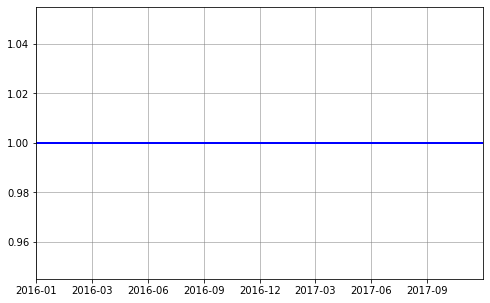

2 0 1


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


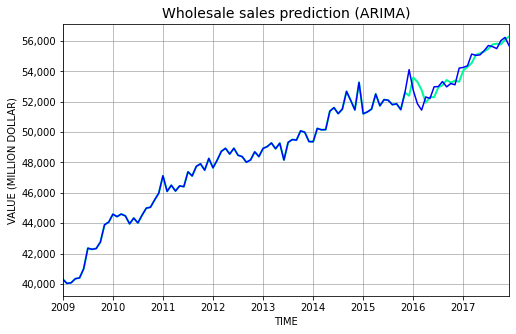

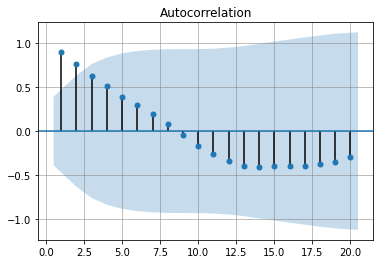

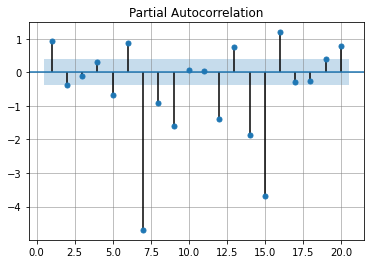

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  106
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -823.254
Method:                       css-mle   S.D. of innovations            570.734
Date:                Wed, 29 Jul 2020   AIC                           1654.508
Time:                        06:12:07   BIC                           1665.161
Sample:                             1   HQIC                          1658.826
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.1420     36.969      4.088      0.000      78.684     223.600
ar.L1.D.y     -0.3446      0.096     -3.598      0.000      -0.532      -0.157
ar.L2.D.y     -0.1612      0.095     -1.690      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


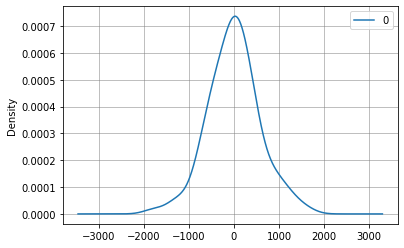

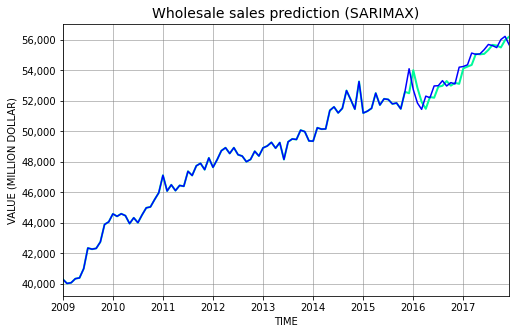

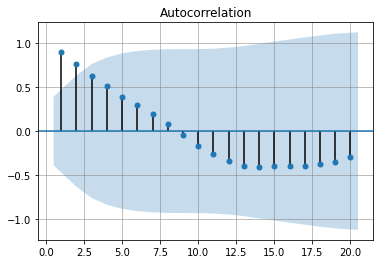

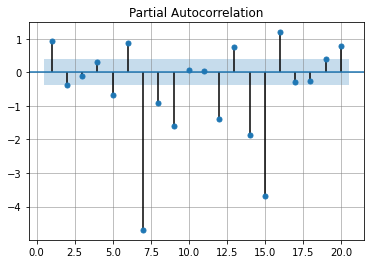

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -831.522
Date:                Wed, 29 Jul 2020   AIC                           1669.043
Time:                        06:12:08   BIC                           1677.033
Sample:                             0   HQIC                          1672.282
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0751      0.050     -1.497      0.134      -0.174       0.023
ar.L2         -0.0048      0.103     -0.047      0.963      -0.207       0.197
sigma2      3.761e+05   4.58e+04      8.206      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/seasonal.py:133: RuntimeWarning: divide by zero encountered in true_divide
  filt = np.array([.5] + [1] * (freq - 1) + [.5]) / freq
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


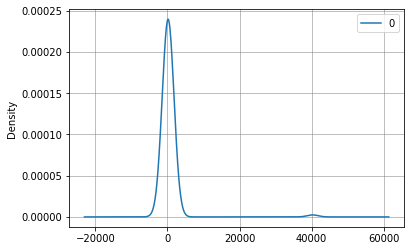

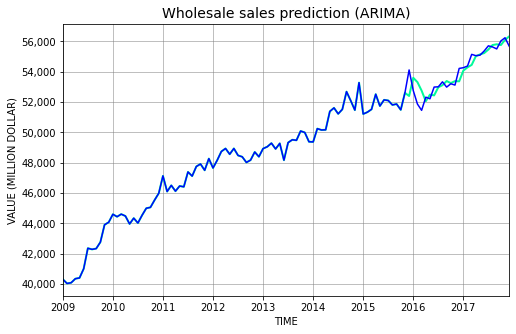

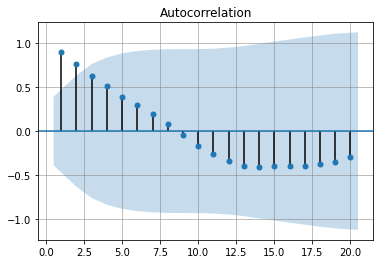

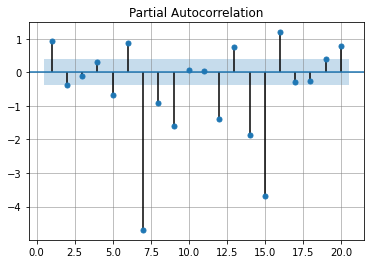

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  106
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -822.558
Method:                       css-mle   S.D. of innovations            566.860
Date:                Wed, 29 Jul 2020   AIC                           1655.115
Time:                        06:12:12   BIC                           1668.433
Sample:                             1   HQIC                          1660.513
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.7533     28.978      5.202      0.000      93.958     207.548
ar.L1.D.y      0.2659      0.326      0.817      0.416      -0.372       0.904
ar.L2.D.y      0.0263      0.165      0.159      0.8

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


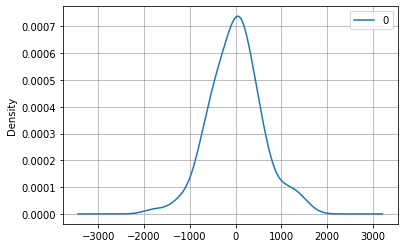

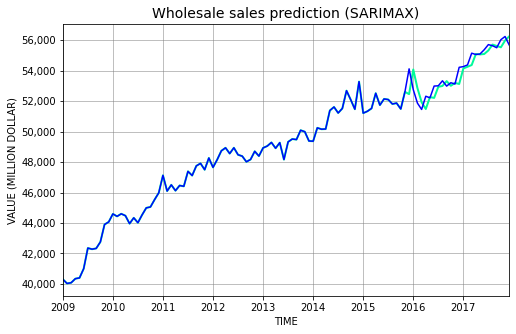

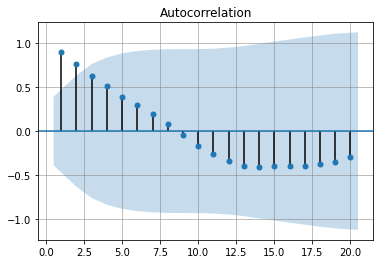

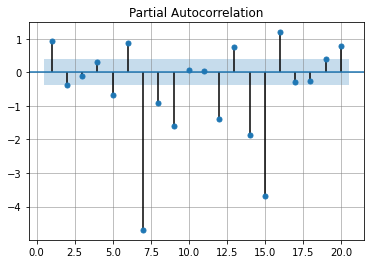

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -831.247
Date:                Wed, 29 Jul 2020   AIC                           1670.493
Time:                        06:12:14   BIC                           1681.147
Sample:                             0   HQIC                          1674.811
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0146      0.185     -5.491      0.000      -1.377      -0.652
ar.L2         -0.0569      0.057     -1.005      0.315      -0.168       0.054
ma.L1          0.9449      0.177      5.329      0.0

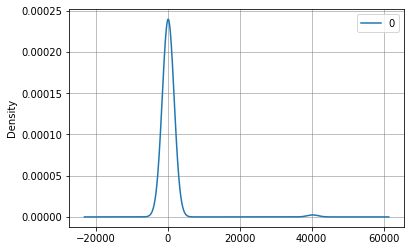

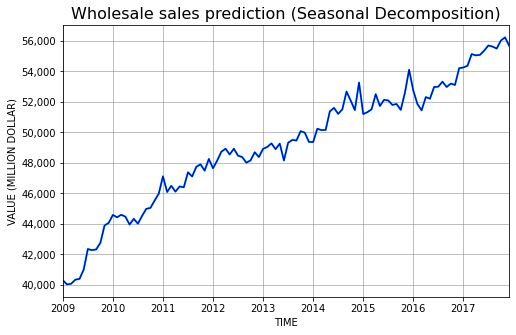

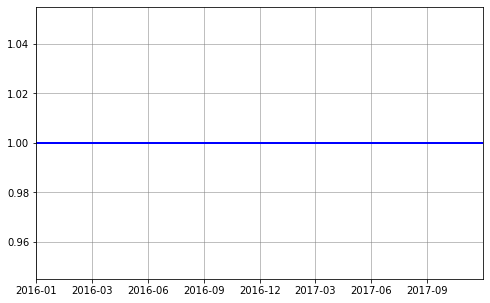

2 1 1


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:693: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


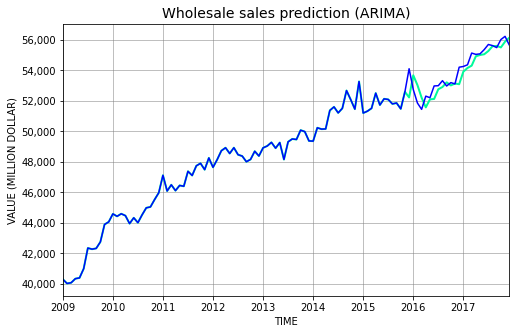

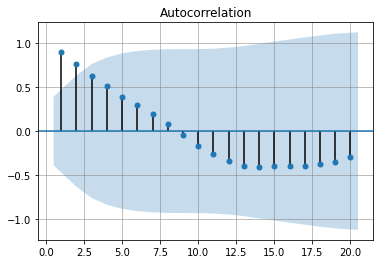

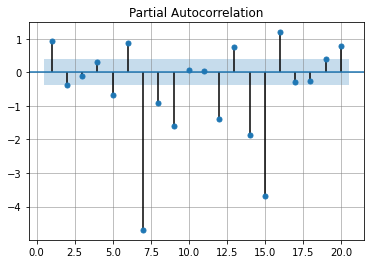

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  107
Model:                     ARMA(3, 0)   Log Likelihood                -840.238
Method:                       css-mle   S.D. of innovations            607.961
Date:                Wed, 29 Jul 2020   AIC                           1690.475
Time:                        06:12:21   BIC                           1703.839
Sample:                             0   HQIC                          1695.893
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.828e+04   7049.167      6.849      0.000    3.45e+04    6.21e+04
ar.L1.y        0.7685      0.097      7.961      0.000       0.579       0.958
ar.L2.y        0.1803      0.120      1.500      0.1

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

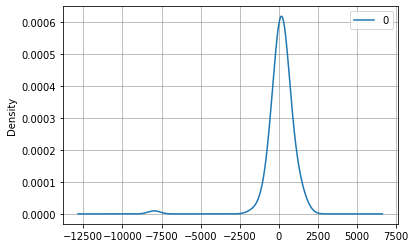

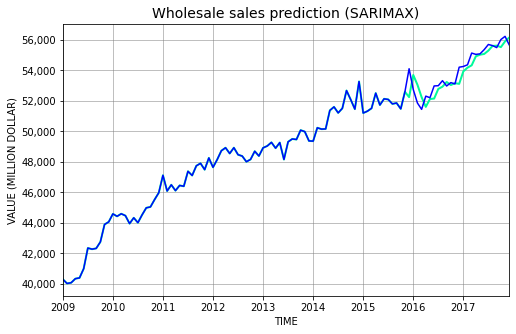

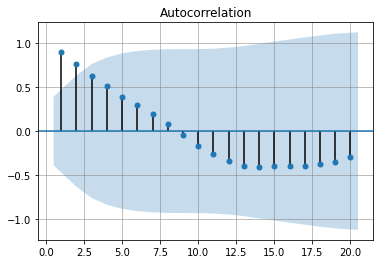

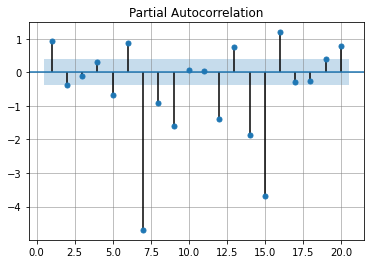

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -842.138
Date:                Wed, 29 Jul 2020   AIC                           1692.276
Time:                        06:12:26   BIC                           1702.967
Sample:                             0   HQIC                          1696.610
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7688      0.076     10.104      0.000       0.620       0.918
ar.L2          0.1811      0.111      1.625      0.104      -0.037       0.399
ar.L3          0.0501      0.105      0.477      0.6

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/seasonal.py:133: RuntimeWarning: divide by zero encountered in true_divide
  filt = np.array([.5] + [1] * (freq - 1) + [.5]) / freq
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np

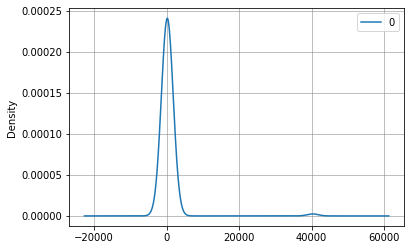

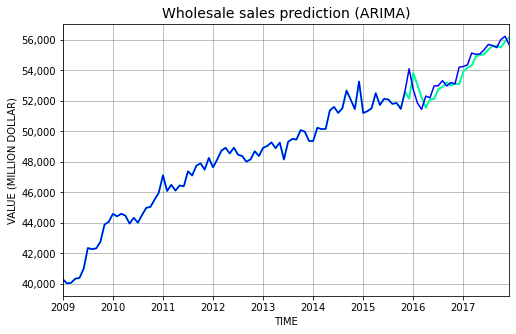

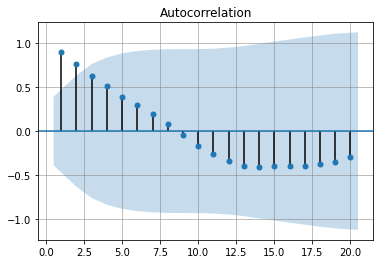

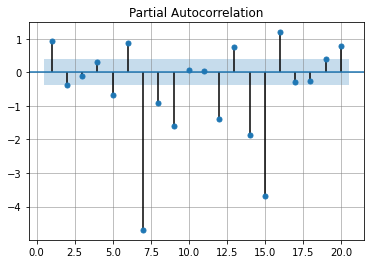

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  107
Model:                     ARMA(3, 1)   Log Likelihood                -840.813
Method:                       css-mle   S.D. of innovations            607.956
Date:                Wed, 29 Jul 2020   AIC                           1693.627
Time:                        06:12:38   BIC                           1709.664
Sample:                             0   HQIC                          1700.128
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.895e+04        nan        nan        nan         nan         nan
ar.L1.y        0.6908      0.195      3.547      0.001       0.309       1.072
ar.L2.y        0.2408      0.179      1.349      0.1

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

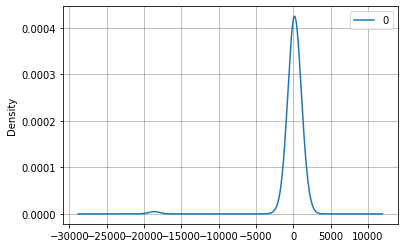

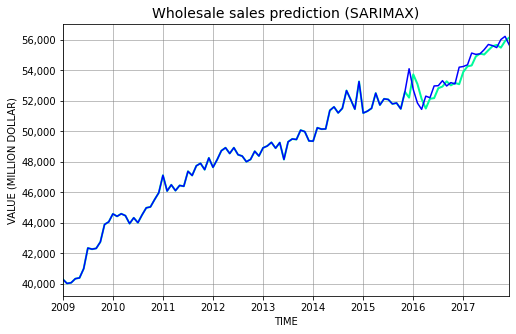

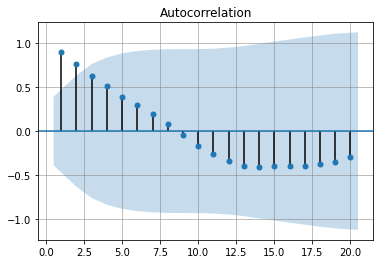

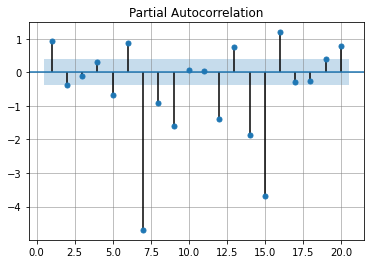

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(3, 0, 1)   Log Likelihood                -842.128
Date:                Wed, 29 Jul 2020   AIC                           1694.255
Time:                        06:12:44   BIC                           1707.619
Sample:                             0   HQIC                          1699.673
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2136      0.079     -2.713      0.007      -0.368      -0.059
ar.L2          0.9900      0.027     36.913      0.000       0.937       1.043
ar.L3          0.2235      0.073      3.075      0.0

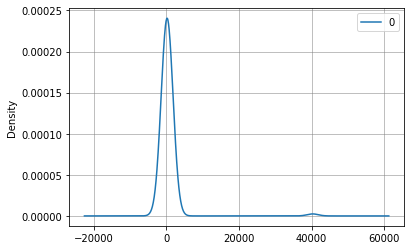

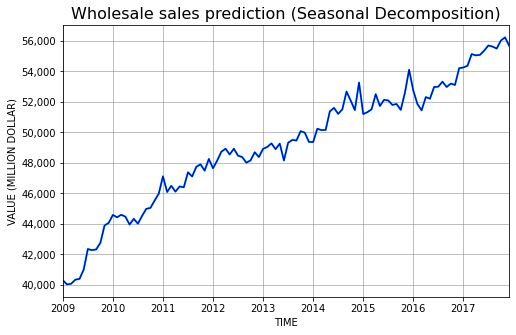

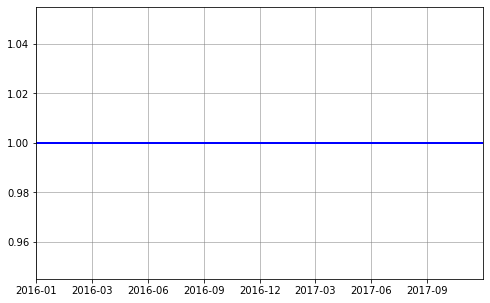

3 0 1


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:693: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


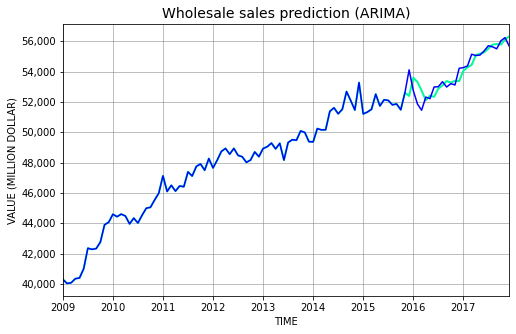

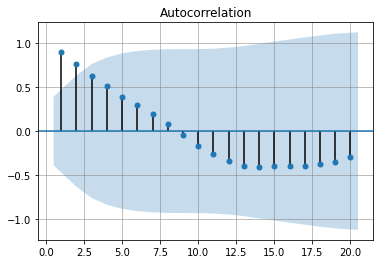

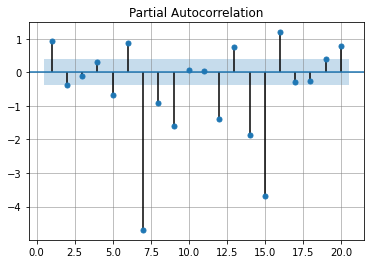

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  106
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -822.754
Method:                       css-mle   S.D. of innovations            567.971
Date:                Wed, 29 Jul 2020   AIC                           1655.507
Time:                        06:12:48   BIC                           1668.824
Sample:                             1   HQIC                          1660.905
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.2584     33.606      4.501      0.000      85.392     217.125
ar.L1.D.y     -0.3604      0.097     -3.731      0.000      -0.550      -0.171
ar.L2.D.y     -0.1949      0.101     -1.935      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


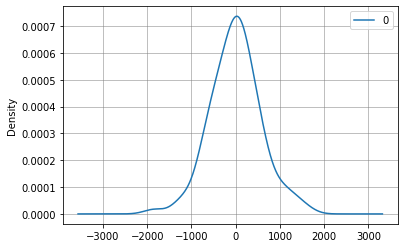

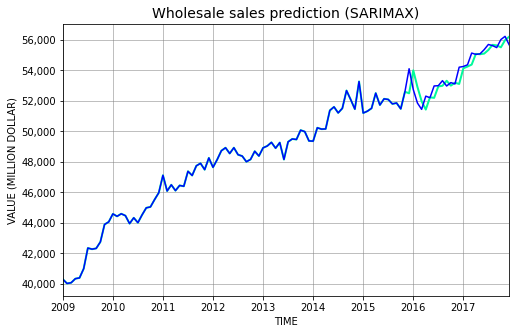

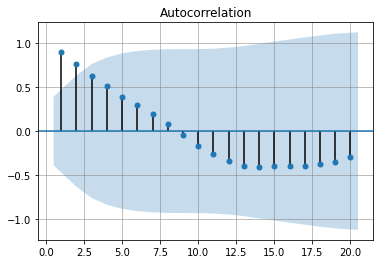

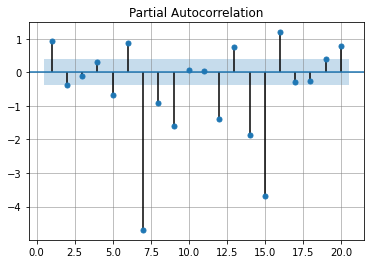

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -831.358
Date:                Wed, 29 Jul 2020   AIC                           1670.715
Time:                        06:12:50   BIC                           1681.369
Sample:                             0   HQIC                          1675.033
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0741      0.051     -1.467      0.142      -0.173       0.025
ar.L2      -3.408e-05      0.105     -0.000      1.000      -0.205       0.205
ar.L3          0.0279      0.089      0.311      0.7

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/seasonal.py:133: RuntimeWarning: divide by zero encountered in true_divide
  filt = np.array([.5] + [1] * (freq - 1) + [.5]) / freq
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+n

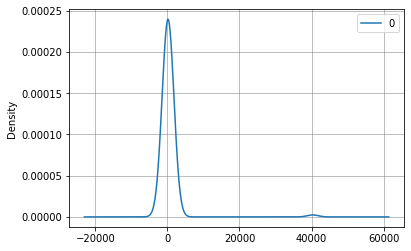

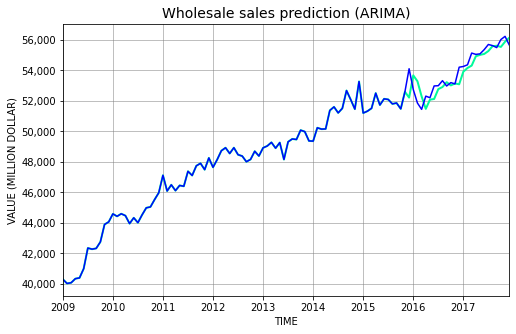

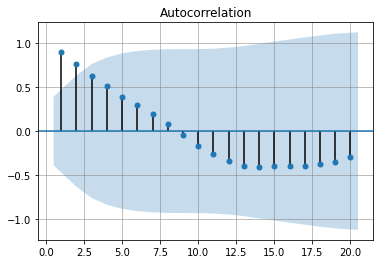

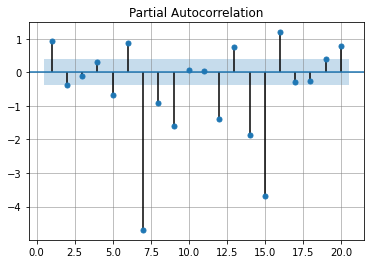

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  107
Model:                     ARMA(4, 0)   Log Likelihood                -840.182
Method:                       css-mle   S.D. of innovations            607.654
Date:                Wed, 29 Jul 2020   AIC                           1692.365
Time:                        06:13:00   BIC                           1708.402
Sample:                             0   HQIC                          1698.866
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.803e+04   7021.754      6.841      0.000    3.43e+04    6.18e+04
ar.L1.y        0.7701      0.097      7.970      0.000       0.581       0.959
ar.L2.y        0.1864      0.122      1.533      0.1

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

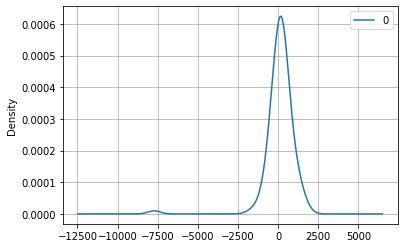

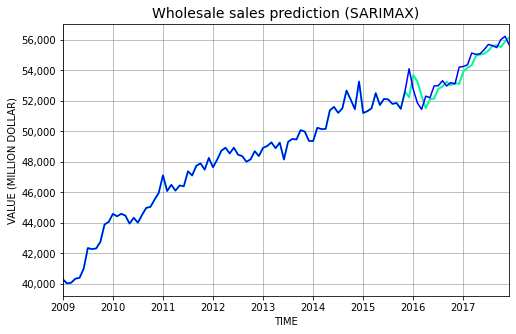

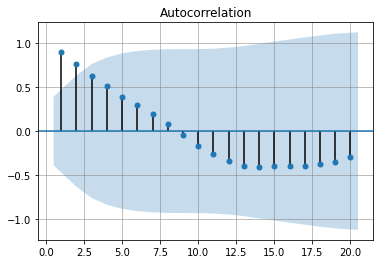

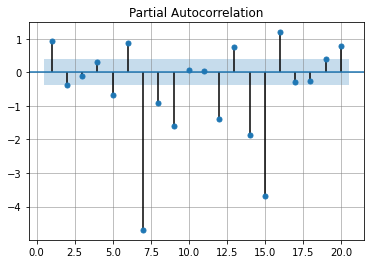

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(4, 0, 0)   Log Likelihood                -842.115
Date:                Wed, 29 Jul 2020   AIC                           1694.229
Time:                        06:13:06   BIC                           1707.593
Sample:                             0   HQIC                          1699.647
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7705      0.077      9.985      0.000       0.619       0.922
ar.L2          0.1867      0.108      1.732      0.083      -0.025       0.398
ar.L3          0.0735      0.125      0.589      0.5

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/seasonal.py:133: RuntimeWarning: divide by zero encountered in true_divide
  filt = np.array([.5] + [1] * (freq - 1) + [.5]) / freq
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+n

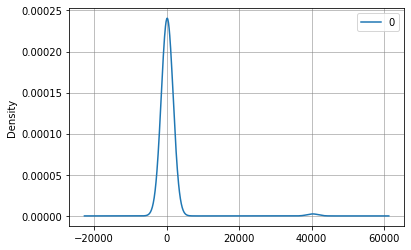

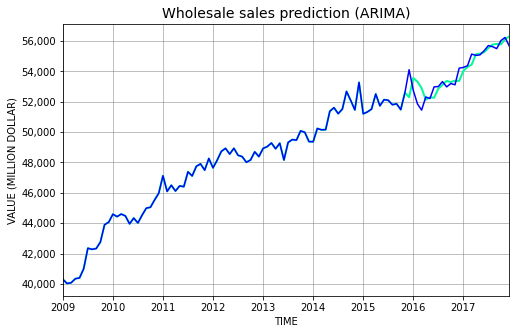

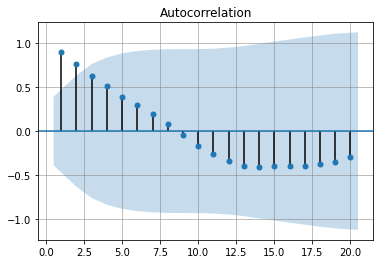

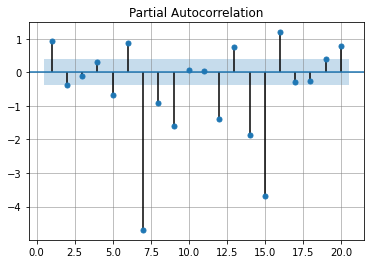

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  106
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -822.641
Method:                       css-mle   S.D. of innovations            567.347
Date:                Wed, 29 Jul 2020   AIC                           1657.282
Time:                        06:13:15   BIC                           1673.262
Sample:                             1   HQIC                          1663.759
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.1017     35.143      4.300      0.000      82.222     219.981
ar.L1.D.y     -0.3558      0.097     -3.669      0.000      -0.546      -0.166
ar.L2.D.y     -0.1859      0.102     -1.817      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


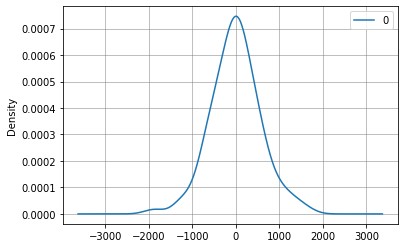

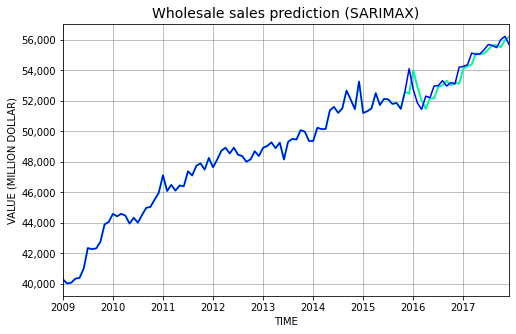

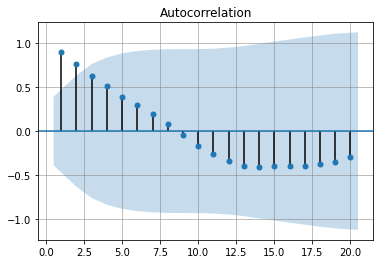

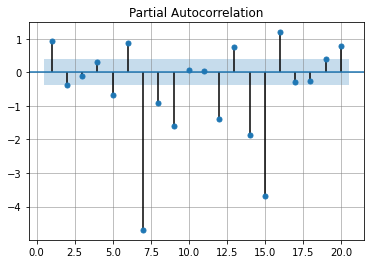

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(4, 1, 0)   Log Likelihood                -830.905
Date:                Wed, 29 Jul 2020   AIC                           1671.809
Time:                        06:13:16   BIC                           1685.126
Sample:                             0   HQIC                          1677.207
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0779      0.049     -1.583      0.114      -0.174       0.019
ar.L2          0.0004      0.105      0.004      0.997      -0.205       0.206
ar.L3          0.0360      0.092      0.393      0.6

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/seasonal.py:133: RuntimeWarning: divide by zero encountered in true_divide
  filt = np.array([.5] + [1] * (freq - 1) + [.5]) / freq
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


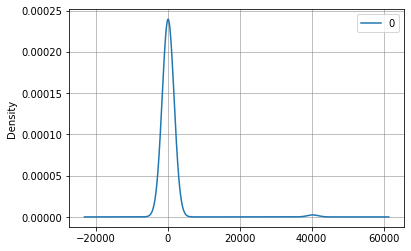

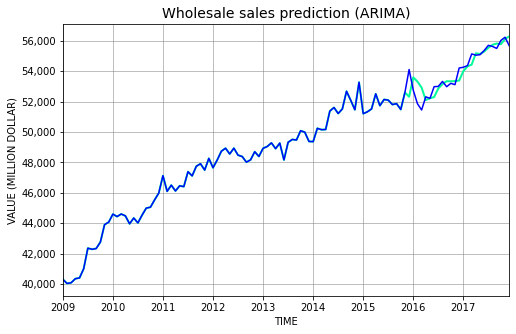

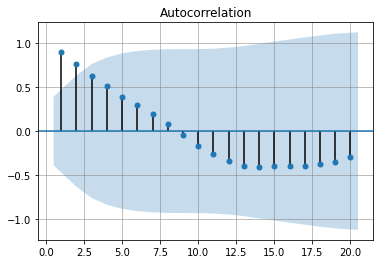

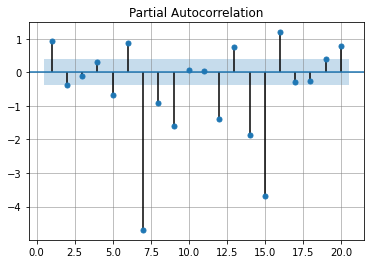

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  106
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -822.205
Method:                       css-mle   S.D. of innovations            564.929
Date:                Wed, 29 Jul 2020   AIC                           1658.410
Time:                        06:13:24   BIC                           1677.054
Sample:                             1   HQIC                          1665.966
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.0397     35.767      4.223      0.000      80.938     221.141
ar.L1.D.y     -0.7789      0.353     -2.208      0.029      -1.470      -0.088
ar.L2.D.y     -0.3311      0.175     -1.897      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

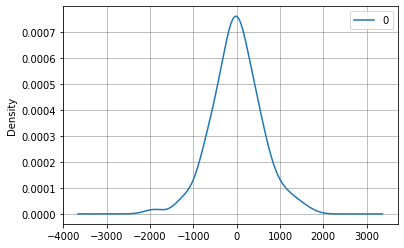

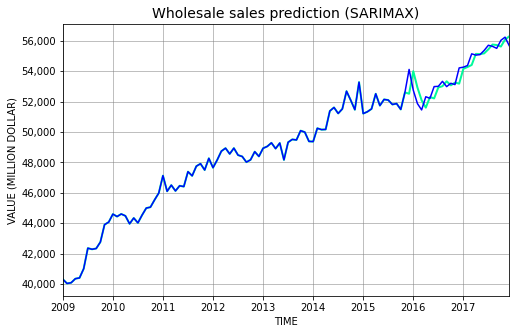

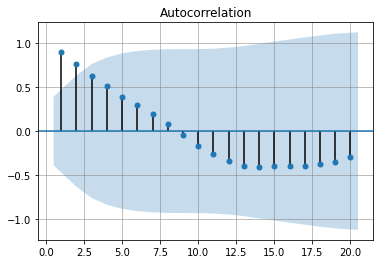

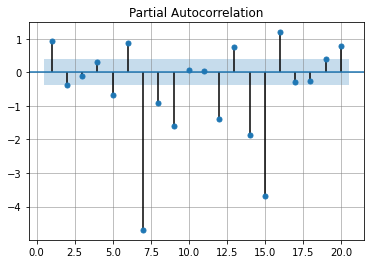

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(4, 1, 1)   Log Likelihood                -826.640
Date:                Wed, 29 Jul 2020   AIC                           1665.279
Time:                        06:13:32   BIC                           1681.260
Sample:                             0   HQIC                          1671.756
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8269      0.059     13.924      0.000       0.711       0.943
ar.L2          0.0756      0.074      1.020      0.308      -0.070       0.221
ar.L3          0.0380      0.104      0.365      0.7

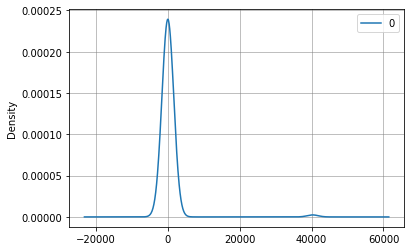

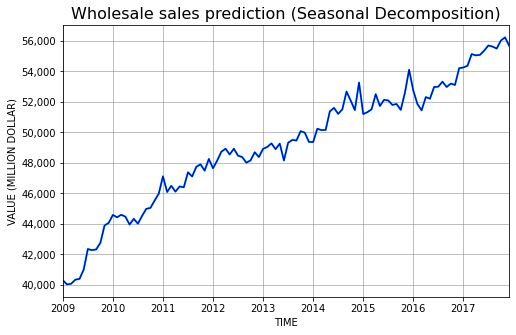

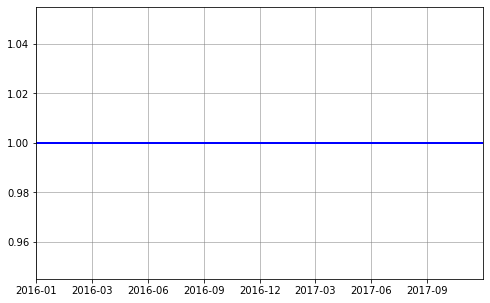

4 1 1


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:649: RuntimeWarning: invalid value encountered in double_scalars
  (1-a**2)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: divide by zero encountered in arctanh
  invarcoefs = 2*np.arctanh(params)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:693: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in arctanh
  invarcoefs 

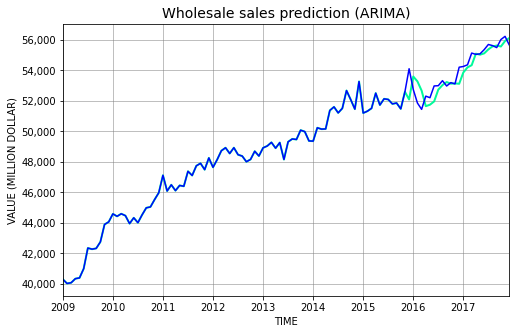

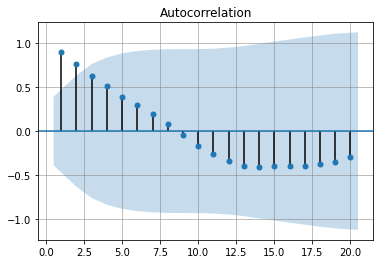

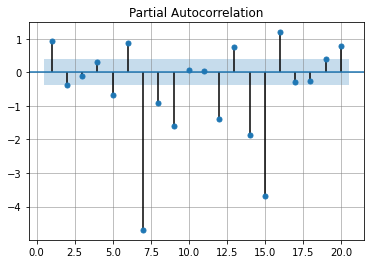

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  107
Model:                     ARMA(5, 0)   Log Likelihood                -838.697
Method:                       css-mle   S.D. of innovations            599.027
Date:                Wed, 29 Jul 2020   AIC                           1691.394
Time:                        06:13:50   BIC                           1710.103
Sample:                             0   HQIC                          1698.978
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.843e+04   6673.150      7.258      0.000    3.54e+04    6.15e+04
ar.L1.y        0.7648      0.095      8.021      0.000       0.578       0.952
ar.L2.y        0.1987      0.120      1.657      0.1

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

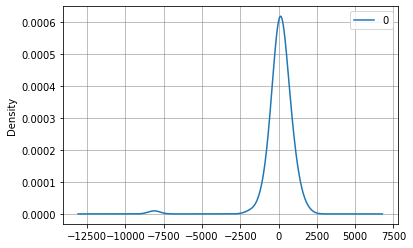

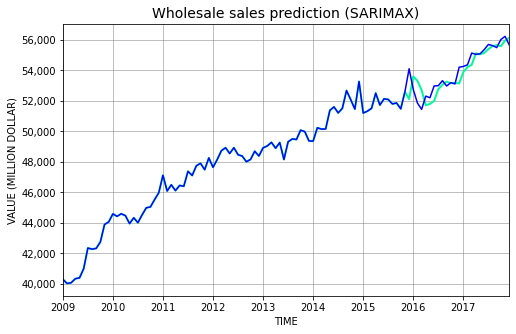

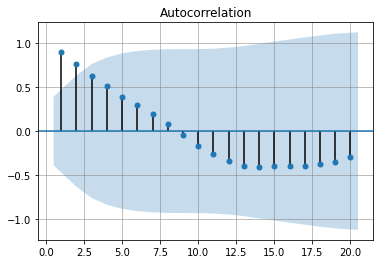

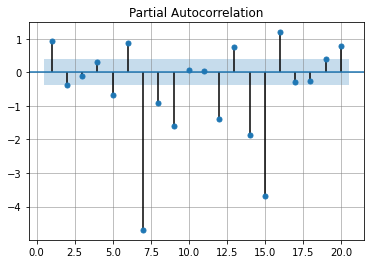

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(5, 0, 0)   Log Likelihood                -840.634
Date:                Wed, 29 Jul 2020   AIC                           1693.267
Time:                        06:13:58   BIC                           1709.304
Sample:                             0   HQIC                          1699.768
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7649      0.078      9.784      0.000       0.612       0.918
ar.L2          0.1990      0.114      1.742      0.081      -0.025       0.423
ar.L3          0.1053      0.123      0.855      0.3

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/seasonal.py:133: RuntimeWarning: divide by zero encountered in true_divide
  filt = np.array([.5] + [1] * (freq - 1) + [.5]) / freq
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from google.colab import  drive
drive.mount('/drive')
df_Error_Table = pd.DataFrame(columns=['P','D','Q','North American Industry Classification System (NAICS)', 'ARIMA_RMSE', 'ARIMA_MAPE','SARIMAX_RMSE','SARIMAX_MAPE','Seasonal Decompose_RMSE','Seasonal Decompose_MAPE'])
A_RMSE = 0
A_MAPE = 0
S_RMSE = 0
S_MAPE = 0
SD_RMSE = 0
SD_MAPE = 0

for a in range (0, 13):
  for b in range (0, 2):
    for c in range (0, 4):
      try:
        A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale_CV (df_NAICS_All_P_N, a, b, c)
        S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale_CV (df_NAICS_All_P_N, a, b, c)
        SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale_CV (df_NAICS_All_P_N, a, b, c)
        print (a, b, c)
      except:
        pass
      df_Error_Table = df_Error_Table.append({'P':a, 'D':b, 'Q':c, 'North American Industry Classification System (NAICS)':'Total Wholesale Sales', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)
      df_Error_Table = df_Error_Table.append({'P':a, 'D':b, 'Q':c, 'North American Industry Classification System (NAICS)':'Total Wholesale Sales', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE}, ignore_index = True)
      df_Error_Table = df_Error_Table.append({'P':a, 'D':b, 'Q':c, 'North American Industry Classification System (NAICS)':'Total Wholesale Sales', 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)
      df_Error_Table.to_csv('/drive/My Drive/RU Data Science/Major Research Project/Python Code/ARIMA_Test/df_Error_Table_Cross_Validation.csv')
df_Error_Table